In [1]:
from ROOT import TFile,TTree
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.misc import factorial
#from math import factorial

In [2]:
def poly(x, *param):
    return param[0] + param[1]*x

def poly2(x, *param):
    #return param[0] + param[1]*x + param[2]*x**2
    return param[1]*(x - param[0])**2 + param[2]

def poiss(k, *param):
    print(param)
    return param[1]*(param[0]**k/factorial(k)) * np.exp(-param[0])
    #return (param[0]**k/factorial(k)) * np.exp(-param[0])

def exp(x,*param):
    lamb, x0, N ,y0 = param
    #return param[2]*param[1]*np.exp(-param[1]*(x - param[1])) 
    #return N*lamb*np.exp(-lamb*(x - x0)) 
    return N*np.exp(-lamb*(x - x0)) + y0 

def exp2(x,*param):
    lamb, x0, N = param
    #return param[2]*param[1]*np.exp(-param[1]*(x - param[1])) 
    #return N*lamb*np.exp(-lamb*(x - x0)) 
    return N*np.exp(-lamb*(x - x0)**2) 
    

def CB(x,*params):
    x = x+0j 
    N, a, n, xb, sig = params
    if a < 0:
        a = -a
    if n < 0:
        n = -n
    aa = abs(a)
    A = (n/aa)**n * np.exp(- aa**2 / 2)
    B = n/aa - aa
    total = 0.*x
    total += ((x-xb)/sig  > -a) * N * np.exp(- (x-xb)**2/(2.*sig**2))
    total += ((x-xb)/sig <= -a) * N * A * (B - (x-xb)/sig)**(-n)
    try:
        return total.real
    except:
        return totat
    return total

In [3]:
def load_hist(file,debug=False):
    hists = {}
    for k in Key:
        hists[k] = {}
        for inK in Key[k]:
            if debug: print('--'+k+'  '+inK)
            elif k == 'hits': tree ='Hits/'
            elif k == 'clusters': tree ='Clusters/'
            elif k == '2x Coincidences': tree ='2xCoincidences/'
            elif k == '3x Coincidences': tree ='3xCoincidences/'
            else: tree = k
            #hists[k][inK] = file.Get("BRIL_IT_Analysis/"+tree).Get(inK)
            hists[k][inK] = file.Get("BRIL_IT_Analysis/"+tree+inK)
    return hists

In [4]:
######################
#DataFilePath = "/home/jcordero/CMS/BRIL/data/summaryIran/"
#DataFilePath = "/home/jcordero/CMS/BRIL/data/summaryBak/"
#DataFilePath = "/home/jcordero/CMS/BRIL/data/summaryClus/"
#DataFilePath = "/home/jcordero/CMS/BRIL/data/summaryClus_v1/"
DataFilePath = "/home/jcordero/CMS/BRIL/data/summaryMerge/"

Key = {"Residuals":['ResidualsX',
                     'ResidualsY',
                     'ResidualsR'],
       "perModule":["Number of Clusters per module per event", 
                     "Number of Hits per module per event"],
       "clusters":["Number of clusters for Disk -4",
                    "Number of clusters for Disk -3",
                    "Number of clusters for Disk -2",
                    "Number of clusters for Disk -1",
                    "Number of clusters for Disk 1",
                    "Number of clusters for Disk 2",
                    "Number of clusters for Disk 3",
                    "Number of clusters for Disk 4",
                    "SizeX of clusters for Disk -4",
                    "SizeX of clusters for Disk -3",
                    "SizeX of clusters for Disk -2",
                    "SizeX of clusters for Disk -1",
                    "SizeX of clusters for Disk 1",
                    "SizeX of clusters for Disk 2",
                    "SizeX of clusters for Disk 3",
                    "SizeX of clusters for Disk 4",                   
                    "SizeY of clusters for Disk -4",
                    "SizeY of clusters for Disk -3",
                    "SizeY of clusters for Disk -2",
                    "SizeY of clusters for Disk -1",
                    "SizeY of clusters for Disk 1",
                    "SizeY of clusters for Disk 2",
                    "SizeY of clusters for Disk 3",
                    "SizeY of clusters for Disk 4",                                      
                    "RVsZ",
                    "XVsY"],
       "hits":["Number of hits for Disk -4",
                "Number of hits for Disk -3",
                "Number of hits for Disk -2",
                "Number of hits for Disk -1",
                "Number of hits for Disk 1",
                "Number of hits for Disk 2",
                "Number of hits for Disk 3",
                "Number of hits for Disk 4",
                "RVsZ",
                "XVsY"],
       "2x Coincidences":["Number of 2x Coincidences for Disk -4",
                          "Number of 2x Coincidences for Disk -3",
                          "Number of 2x Coincidences for Disk -2",
                          "Number of 2x Coincidences for Disk -1",
                          "Number of 2x Coincidences for Disk 1",
                          "Number of 2x Coincidences for Disk 2",
                          "Number of 2x Coincidences for Disk 3",
                          "Number of 2x Coincidences for Disk 4",
                          "Number of real 2x Coincidences for Disk -4",
                          "Number of real 2x Coincidences for Disk -3",
                          "Number of real 2x Coincidences for Disk -2",
                          "Number of real 2x Coincidences for Disk -1",
                          "Number of real 2x Coincidences for Disk 1",
                          "Number of real 2x Coincidences for Disk 2",
                          "Number of real 2x Coincidences for Disk 3",
                          "Number of real 2x Coincidences for Disk 4",
                          "RVsZ",
                          "XVsY"],
       "3x Coincidences":["Number of 3x Coincidences for Disk -4",
                          "Number of 3x Coincidences for Disk -3",
                          "Number of 3x Coincidences for Disk -2",
                          "Number of 3x Coincidences for Disk -1",
                          "Number of 3x Coincidences for Disk 1",
                          "Number of 3x Coincidences for Disk 2",
                          "Number of 3x Coincidences for Disk 3",
                          "Number of 3x Coincidences for Disk 4",
                          "Number of real 3x Coincidences for Disk -4",
                          "Number of real 3x Coincidences for Disk -3",
                          "Number of real 3x Coincidences for Disk -2",
                          "Number of real 3x Coincidences for Disk -1",
                          "Number of real 3x Coincidences for Disk 1",
                          "Number of real 3x Coincidences for Disk 2",
                          "Number of real 3x Coincidences for Disk 3",
                          "Number of real 3x Coincidences for Disk 4",
                          "RVsZ",
                          "XVsY"],
    }

######################
#file = TFile(DataFilePath+"summary_runSim.root")
#PU = ['20']
#PU = ['0','1','2','20','30','50','75','100','140','175']
PU = ['0','1','2','10','20','30','50','75','100','140']#,'175','200']

#PU = ['2']
means = {str(pu):{} for pu in PU}

PU_var = PU[0]
#var = 'clusters'
var = 'clusters'
#var = 'hits'
#var = '2x Coincidences'
#var = '3x Coincidences'


#---------------------------------------------------------------
'''
        'clusters':{
                '0'  :{
                    1:2,
                    2:2,
                    3:2,
                    4:2,
                    5:2,
                    },
                '1'  :{
                    1:40,
                    2:30,
                    3:30,
                    4:30,
                    5:30,
                    },
                '2'  :{
                    1:60,
                    2:60,
                    3:60,
                    4:50,
                    5:40,
                    },
                '20' :{
                        1:370,
                        2:320,
                        3:320,
                        4:300,
                        5:280,
                    },
                '30' :{
                        1:530,
                        2:480,
                        3:450,
                        4:400,
                        5:380,
                    },
                '50' :{
                        1:830,
                        2:700,
                        3:630,
                        4:630,
                        5:500,
                    },
                '75' :{
                        1:1300,
                        2:1000,
                        3:900,
                        4:800,
                        5:650,
                    },
                '100':{
                        1:1500,
                        2:1300,
                        3:1100,
                        4:1000,
                        5:900,
                    },
                '140':{
                        1:2000,
                        2:1600,
                        3:1400,
                        4:1300,
                        5:1100,
                    },
                '175':{
                        1:2200,
                        2:2000,
                        3:2000,
                        4:2000,
                        5:2000,
                    },
                },  
''';

xlim = {
        'hits':{
                '0'  :{
                    1:2,
                    2:2,
                    3:2,
                    4:2,
                    5:2,
                    },
                '1'  :{
                    1:30,
                    2:30,
                    3:30,
                    4:30,
                    5:30,
                    },
                '2'  :{
                    1:80,
                    2:80,
                    3:80,
                    4:80,
                    5:80,
                    },
                '10' :{
                    1:900,
                    2:800,
                    3:800,
                    4:800,
                    5:700,
                    },
                '20' :{
                    1:900,
                    2:800,
                    3:800,
                    4:800,
                    5:700,
                    },
                '30' :{
                        1:1300,
                        2:1200,
                        3:1200,
                        4:1200,
                        5:1100,
                    },
                '50' :{
                        1:2000,
                        2:1800,
                        3:1800,
                        4:1800,
                        5:1600,
                    },
                '75' :{
                        1:2800,
                        2:2600,
                        3:2600,
                        4:2600,
                        5:2100,
                        },
                '100':{
                        1:3400,
                        2:3200,
                        3:3200,
                        4:3200,
                        5:2600,
                    },
                '140':{
                        1:4700,
                        2:4500,
                        3:4500,
                        4:4200,
                        5:3800,
                        },
                '175':{
                        1:5000,
                        2:5500,
                        3:5500,
                        4:5500,
                        5:5500,
                    },
                },
        'clusters':{
                '0'  :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '1'  :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '2'  :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '10' :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '20' :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '30' :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '50' :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '75' :{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '100':{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '140':{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '175':{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },
                '200':{
                    1:10,
                    2:10,
                    3:10,
                    4:10,
                    5:10,
                    },           
                },    
        '2x Coincidences':{
                            '0'  :{
                                1:2,
                                2:2,
                                3:2,
                                4:2,
                                5:2,
                                },
                            '1'  :{
                                1:12,
                                2:10,
                                3:8,
                                4:8,
                                5:6,
                                },
                            '2'  :{
                                    1:16,
                                    2:11,
                                    3:10,
                                    4:8,
                                    5:6,
                                    },
                            '10' :{
                                    1:80,
                                    2:50,
                                    3:40,
                                    4:30,
                                    5:18,
                                    },
                            '20' :{
                                    1:80,
                                    2:50,
                                    3:40,
                                    4:30,
                                    5:18,
                                    },
                            '30' :{
                                    1:100,
                                    2:75,
                                    3:50,
                                    4:40,
                                    5:30,
                                },
                            '50' :{
                                    1:160,
                                    2:100,
                                    3:70,
                                    4:60,
                                    5:30,
                                    },
                            '75' :{
                                    1:220,
                                    2:130,
                                    3:90,
                                    4:80,
                                    5:50,
                                    },
                            '100':{
                                    1:240,
                                    2:160,
                                    3:120,
                                    4:90,
                                    5:50,
                                    },
                            '140':{
                                    1:340,
                                    2:220,
                                    3:130,
                                    4:110,
                                    5:80,
                                    },
                            '175':{
                                    1:450,
                                    2:300,
                                    3:220,
                                    4:200,
                                    5:100,
                                    }
                            },
        '3x Coincidences':{
                        '0'  :{
                                1:2,
                                2:2,
                                3:2,
                                4:2,
                                5:2,
                            },
                        '1'  :{
                                1:2,
                                2:2,
                                3:2,
                                4:2,
                                5:2,
                                },
                        '2'  :{
                                1:2,
                                2:2,
                                3:2,
                                4:2,
                                5:2,
                                },
                        '10' :{
                                1:2,
                                2:15,
                                3:10,
                                4:8,
                                5:6,
                                },
                        '20' :{
                                1:2,
                                2:15,
                                3:10,
                                4:8,
                                5:6,
                                },
                        '30' :{
                                1:2,
                                2:16,
                                3:15,
                                4:10,
                                5:9,
                                },
                        '50' :{
                                1:2,
                                2:22,
                                3:18,
                                4:18,
                                5:15,
                                },
                        '75' :{
                                1:2,
                                2:40,
                                3:30,
                                4:25,
                                5:20,
                                },
                        '100':{
                                1:2,
                                2:50,
                                3:30,
                                4:30,
                                5:23,
                                },
                        '140':{
                                1:2,
                                2:50,
                                3:40,
                                4:35,
                                5:25,
                                },
                        '175':{
                                1:2,
                                2:90,
                                3:50,
                                4:30,
                                5:20,
                                },
                        }, 
       }
############# FIT ##############
##               N,     a,  n,    xb, sig   = params
bound_CB = ([0,-10000,-10000,0,-10000],
         [10000,10000,10000,10000,10000])
P0_CB = {
        'hits':{
                '0'  :{
                        1:[ 200000,   30,  1,   0.5, 0.05],
                        2:[ 200000,   30,  1,   0.5, 0.05],
                        3:[ 200000,   30,  1,   0.5, 0.05],
                        4:[ 200000,   30,  1,   0.5, 0.05],
                        5:[ 200000,   30,  1,   0.5, 0.05],
                        },
                '1'  :{
                        1:[  50000,   1,  4,     0,  20],
                        2:[  50000,   1,  4,     0,  20],
                        3:[  50000,   1,  4,     0,  20],
                        4:[  50000,   1,  4,     0,  20],
                        5:[  50000,   1,  4,     0,  20],
                        },
                '2'  :{
                        1:[  50000,   1, 10,     0,  30],
                        2:[  50000,   1, 10,     0,  30],
                        3:[  50000,   1, 10,     0,  30],
                        4:[  50000,   1, 10,     0,  30],
                        5:[  50000,   1, 10,     0,  30],
                        },
                '20' :{
                        1:[   2000,   1, 30,   250, 100],
                        2:[   2000,   1, 30,   250, 100],
                        3:[   2000,   1, 30,   250, 100],
                        4:[   2000,   1, 30,   250, 100],
                        5:[   2000,   1, 30,   250, 100],
                        },
                '30' :{
                        1:[   5000,   1, 30,   200, 100],
                        2:[   5000,   1, 30,   200, 100],
                        3:[   5000,   1, 30,   200, 100],
                        4:[   5000,   1, 30,   200, 100],
                        5:[   5000,   1, 30,   200, 100],
                        },
                '50' :{
                        1:[   5000, 0.1,  5,   300, 200],
                        2:[   5000, 0.1,  5,   300, 200],
                        3:[   5000, 0.1,  5,   300, 200],
                        4:[   5000, 0.1,  5,   300, 200],
                        5:[   5000, 0.1,  5,   300, 200],
                        },
                '75' :{
                        1:[   7000,   1, 10,  1000, 300],
                        2:[   7000,   1, 10,  1000, 300],
                        3:[   7000,   1, 10,  1000, 300],
                        4:[   7000,   1, 10,  1000, 300],
                        5:[   7000,   1, 10,  1000, 300],
                        },
                '100':{
                        1:[   3000,   1,  2,  1500, 500],
                        2:[   3000,   1,  2,  1500, 500],
                        3:[   3000,   1,  2,  1500, 500],
                        4:[   3000,   1,  2,  1500, 500],
                        5:[   3000,   1,  2,  1500, 500],
                        },
                '140':{
                        1:[   2000,  20, 10,  2200, 500],
                        2:[   2000,  20, 10,  2200, 500],
                        3:[   2000,  20, 10,  2200, 500],
                        4:[   2000,  20, 10,  2200, 500],
                        5:[   2000,  20, 10,  2200, 500],
                        },
                '175':{
                        1:[   7000,   1, 30,  3000, 1000],
                        2:[   7000,   1, 40,  3000, 1000],
                        3:[   7000,   1, 40,  3000, 1000],
                        4:[   7000,   1, 80,  3000, 1000],
                        5:[   7000,   1, 40,  2000, 1000],
                        },
                },
        'clusters':{
                '0'  :{
                        1:[ 500000,   1,  3,   0.5, 0.5],
                        2:[ 500000,   1,  3,   0.5, 0.5],
                        3:[ 500000,   1,  3,   0.5, 0.5],
                        4:[ 500000,   1,  3,   0.5, 0.5],
                        5:[ 500000,   1,  3,   0.5, 0.5],
                        },
                '1'  :{
                        1:[  50000,   1,  4,     0,  20],
                        2:[  50000,   1,  4,     0,  20],
                        3:[  50000,   1,  4,     0,  20],
                        4:[  50000,   1,  4,     0,  20],
                        5:[  50000,   1,  4,     0,  20],
                        },
                '2'  :{
                        1:[  50000,   1, 10,     0,  20],
                        2:[  50000,   1, 10,     0,  20],
                        3:[  50000,   1, 10,     0,  20],
                        4:[  50000,   1, 10,     0,  20],
                        5:[  50000,   1, 10,     0,  20],
                        },
                '10' :{
                        1:[   4000,   1, 30,    70, 100],
                        2:[   4000,   1, 30,    70, 100],
                        3:[   4000,   1, 30,    70, 100],
                        4:[   4000,   1, 30,    70, 100],
                        5:[   4000,   1, 30,    70, 100],
                        },
                '20' :{
                        1:[   4000,   1, 30,    70, 100],
                        2:[   4000,   1, 30,    70, 100],
                        3:[   4000,   1, 30,    70, 100],
                        4:[   4000,   1, 30,    70, 100],
                        5:[   4000,   1, 30,    70, 100],
                        },
                '30' :{
                        1:[   5000,   1, 30,   200, 100],
                        2:[   5000,   1, 30,   200, 100],
                        3:[   5000,   1, 30,   200, 100],
                        4:[   5000,   1, 30,   200, 100],
                        5:[   5000,   1, 30,   200, 100],
                        },
                '50' :{
                        1:[   5000, 0.1,  5,   300, 200],
                        2:[   5000, 0.1,  5,   300, 200],
                        3:[   5000, 0.1,  5,   300, 200],
                        4:[   5000, 0.1,  5,   300, 200],
                        5:[   5000, 0.1,  5,   300, 200],
                        },
                '75' :{
                        1:[   5000,   1, 40,   200, 200],
                        2:[   5000,   1, 40,   200, 200],
                        3:[   5000,   1, 40,   200, 200],
                        4:[   5000,   1, 40,   200, 200],
                        5:[   5000,   1, 40,   200, 200],
                        },
                '100':{
                        1:[   2000,   1, 10,   600, 200],
                        2:[   2000,   1, 10,   600, 200],
                        3:[   2000,   1, 10,   600, 200],
                        4:[   2000,   1, 10,   600, 200],
                        5:[   2000,   1, 10,   600, 200],
                        },
                '140':{
                        1:[   2000,   1, 30,   600, 200],
                        2:[   2000,   1, 30,   600, 200],
                        3:[   2000,   1, 30,   600, 200],
                        4:[   2000,   1, 30,   600, 200],
                        5:[   2000,   1, 30,   600, 200],
                        },
                '175':{
                        1:[   5000,   1, 20,   800, 200],
                        2:[   5000,   1, 20,   800, 200],
                        3:[   5000,   1, 20,   800, 200],
                        4:[   5000,   1, 20,   800, 200],
                        5:[   6000,   1, 20,   600, 200],
                        },
                },    
        '2x Coincidences':{
                        '0'  :{
                                1:[ 100000,   1,  30,   0,   1],
                                2:[  80000,   1,  30,   0,   1],
                                3:[ 100000,   1,  50,   0,   1],
                                4:[ 500000,   1,  30,   0,   1],
                                5:[ 500000,   1,  30,   0, 0.5],
                                },
                        '1'  :{
                                1:[ 100000,   1, -8,   0.6,  2],
                                2:[ 100000,   1, -8,     1,  2],
                                3:[ 100000,   1, 10,     1,  1],
                                4:[ 100000,   1, 10,   0.5,  3],
                                5:[ 100000,   1, 10,   0.5,  3],
                                },
                        '2'  :{
                                1:[ 160000,   1,  3,     0,   5],
                                2:[ 160000,   1,  3,     0,   5],
                                3:[ 160000,   1,  3,     0,   5],
                                4:[ 160000,   1,  3,     0,   2],
                                5:[ 160000,   1,  3,     1,   3],
                                },
                        '20' :{
                                1:[   7000,   1,  8,    10,  8],
                                2:[   7000,   1,  8,    10,  8],
                                3:[   7000,   1,  8,    10,  8],
                                4:[   7000,   1,  8,    10,  8],
                                5:[   7000,   1, 20,     2,  2],
                                },
                        '30' :{
                                1:[   5000, 0.3,  8,    10,  8],
                                2:[   5000, 0.3,  8,    10,  8],
                                3:[   5000, 0.3,  8,    10,  8],
                                4:[   5000, 0.3,  8,    10,  8],
                                5:[   5000, 0.3, 20,     5,  3],
                                },
                        '50' :{
                                1:[   7000, 0.3, 10,    10,  15],
                                2:[   7000, 0.3, 10,    10,  15],
                                3:[   7000, 0.3, 10,    10,  15],
                                4:[   7000, 0.3, 10,    10,  15],
                                5:[   7000, 0.3, 10,    10,  15],
                                },
                        '75' :{
                                1:[   7000,   1, 10,   100,  50],
                                2:[   7000,   1, 10,    60,  20],
                                3:[   7000,   1, 10,    40,  20],
                                4:[   7000,   1, 10,    30,  20],
                                5:[   7000,   1, 10,    10,  15],
                                },
                        '100':{
                                1:[   3000,   1, 10,   100,  30],
                                2:[   3000,   1, 10,    60,  20],
                                3:[   3000,   1, 10,    40,  15],
                                4:[   3000,   1, 10,    30,  15],
                                5:[   3000,   1, 30,    15,  10],
                                },
                        '140':{
                                1:[   4000,   3, 10,   150,  50],
                                2:[   4000,   3, 10,    50,  15],
                                3:[   4000,   3, 10,    50,  15],
                                4:[   4000,   3, 10,    50,  15],
                                5:[   4000,   3, 10,    50,  15],
                                },
                        '175':{
                                1:[   7000,   1, 20,   200,   50],
                                2:[   5000,   1, 20,   150,   50],
                                3:[   5000,   1, 20,   100,   20],
                                4:[   5000,   1, 20,    80,   20],
                                5:[   5000,   1, 20,    30,   10],
                                },
                        },    
        '3x Coincidences':{
                            '0'  :{
                                    1:[ 5000,   1,  3,   0, 0.5],
                                    2:[ 5000,   1,  3,   0, 0.5],
                                    3:[ 5000,   1,  3,   0, 0.5],
                                    4:[ 5000,   1,  3,   0, 0.5],
                                    5:[ 5000,   1,  3,   0, 0.5],
                                    },
                            '1'  :{
                                    1:[ 2000,   1,  3,   0, 0.5],
                                    2:[ 2000,   1,  1,   0, 0.5],
                                    3:[ 2000,   1,  1,   0, 0.5],
                                    4:[ 2000,   1,  3,   0, 0.5],
                                    5:[ 2000,   1,  3,   0, 0.5],
                                    },
                            '2'  :{
                                    1:[ 2000,   1,  3,   0, 0.5],
                                    2:[ 2000,   1,  1,   0, 0.5],
                                    3:[ 2000,   1,  3,   0, 0.5],
                                    4:[ 2000,   1,  3,   0, 0.5],
                                    5:[ 2000,   1,  1,   0, 0.5],
                                    },
                            '20' :{
                                    1:[   8000, 0.3,  3,     0,   1],
                                    2:[   8000, 0.3,  3,     2,   1],
                                    3:[   8000,   1,  3,     2,   2],
                                    4:[   8000,   1,  1,     3,   2],
                                    5:[    800, 0.3,  1,     2,   3],
                                    },
                            '30' :{
                                    1:[   2000,   1,  1,     0,   1],
                                    2:[  20000,   1, 10,     5,   3],
                                    3:[   8000,   1, 10,     5,   2],
                                    4:[  20000,   1,  2,     3,   2],
                                    5:[  10000,   1,  2,   2.5,   1],
                                    },
                            '50' :{
                                    1:[    200,   1,  1,     0,   1],
                                    2:[   7000, 0.3, 10,     8,   1],
                                    3:[   7000, 0.3, 10,     5,   1],
                                    4:[   7000, 0.3, 10,     5,   1],
                                    5:[   7000, 0.3,  2,     3,   1],
                                    },
                            '75' :{
                                    1:[  20000,   1, 20,     0, 0.3],
                                    2:[   7000,   1, 10,    10,   5],
                                    3:[   7000,   1, 10,    10,   5],
                                    4:[   7000,   1, 10,     8,   5],
                                    5:[   7000,   1, 10,     5,   5],
                                    },
                            '100':{
                                    1:[    100,   1,  1,     0,   1],
                                    2:[   3000,   1, 10,    10,   5],
                                    3:[   3000,   1, 10,    10,   5],
                                    4:[   3000,   1, 10,    10,   5],
                                    5:[   3000,   1, 10,     5,   5],
                                    },
                            '140':{
                                    1:[    100,   1,  1,     0,   1],
                                    2:[   4000,   3, 10,    30,   5],
                                    3:[   4000,   3, 10,    15,   5],
                                    4:[   4000,   3, 10,    15,   5],
                                    5:[   4000,   3, 10,     5,   5],
                                    },
                            '175':{
                                    1:[    200,   1, 40,     0, 0.5],
                                    2:[   5000,   1, 20,    25,  10],
                                    3:[   5000,   1, 20,    18,   8],
                                    4:[   5000,   1, 20,    15,   5],
                                    5:[   5000,   1, 20,     5,   5],
                                    },
                            },    
        }

bound_poiss = ([0,-10],[100000,100000])
P0_poiss = {
            'hits':{
                    '0'  :{
                            1:[ 500000,   0.5],
                            2:[ 500000,   0.5],
                            3:[ 500000,   0.5],
                            4:[ 500000,   0.5],
                            5:[ 500000,   0.5],
                            },
                    '1'  :{
                            1:[ 500000,   0.5],
                            2:[ 500000,   0.5],
                            3:[ 500000,   0.5],
                            4:[ 500000,   0.5],
                            5:[ 500000,   0.5],
                            },
                    '2'  :{
                            1:[ 50000,   0.5],
                            2:[ 50000,   0.5],
                            3:[ 50000,   0.5],
                            4:[ 50000,   0.5],
                            5:[ 50000,   0.5],
                            },
                    '10' :{
                            1:[ 50000,   400],
                            2:[ 50000,   400],
                            3:[ 50000,   400],
                            4:[ 50000,   400],
                            5:[ 50000,   400],
                            },
                    '20' :{
                            1:[ 50000,   400],
                            2:[ 50000,   400],
                            3:[ 50000,   400],
                            4:[ 50000,   400],
                            5:[ 50000,   400],
                            },
                    '30' :{
                            1:[ 5000,   500],
                            2:[ 5000,   500],
                            3:[ 5000,   500],
                            4:[ 5000,   500],
                            5:[ 5000,   500],
                            },
                    '50' :{
                            1:[ 5000,   600],
                            2:[ 5000,   600],
                            3:[ 5000,   600],
                            4:[ 5000,   600],
                            5:[ 5000,   600],
                            },
                    '75' :{
                            1:[ 7000,   1000],
                            2:[ 7000,   1000],
                            3:[ 7000,   1000],
                            4:[ 7000,   1000],
                            5:[ 7000,   1000],
                            },
                    '100':{
                            1:[ 4000,   1500],
                            2:[ 4000,   1500],
                            3:[ 4000,   1500],
                            4:[ 4000,   1500],
                            5:[ 4000,   1500],
                            },
                    '140':{
                            1:[ 6000,   2000],
                            2:[ 6000,   2000],
                            3:[ 6000,   2000],
                            4:[ 6000,   2000],
                            5:[ 6000,   2000],
                            },
                    '175':{
                            1:[ 6000,   2000],
                            2:[ 6000,   2000],
                            3:[ 6000,   2000],
                            4:[ 6000,   2000],
                            5:[ 6000,   2000],
                            },
                    },
            'clusters':{
                    '0'  :{
                            1:[ 500000,   0.5],
                            2:[ 500000,   0.5],
                            3:[ 500000,   0.5],
                            4:[ 500000,   0.5],
                            5:[ 500000,   0.5],
                            },
                    '1'  :{
                            1:[ 500000,   0.5],
                            2:[ 500000,   0.5],
                            3:[ 500000,   0.5],
                            4:[ 500000,   0.5],
                            5:[ 500000,   0.5],
                            },
                    '2'  :{
                            1:[ 50000,   0.5],
                            2:[ 50000,   0.5],
                            3:[ 50000,   0.5],
                            4:[ 50000,   0.5],
                            5:[ 50000,   0.5],
                            },
                    '10' :{
                            1:[ 50000,   400],
                            2:[ 50000,   400],
                            3:[ 50000,   400],
                            4:[ 50000,   400],
                            5:[ 50000,   400],
                            },
                    '20' :{
                            1:[ 50000,   400],
                            2:[ 50000,   400],
                            3:[ 50000,   400],
                            4:[ 50000,   400],
                            5:[ 50000,   400],
                            },
                    '30' :{
                            1:[ 50000,   500],
                            2:[ 50000,   500],
                            3:[ 50000,   500],
                            4:[ 50000,   500],
                            5:[ 50000,   500],
                            },
                    '50' :{
                            1:[ 5000,   600],
                            2:[ 5000,   600],
                            3:[ 5000,   600],
                            4:[ 5000,   600],
                            5:[ 5000,   600],
                            },
                    '75' :{
                            1:[ 7000,   1000],
                            2:[ 7000,   1000],
                            3:[ 7000,   1000],
                            4:[ 7000,   1000],
                            5:[ 7000,   1000],
                            },
                    '100':{
                            1:[ 4000,   1500],
                            2:[ 4000,   1500],
                            3:[ 4000,   1500],
                            4:[ 4000,   1500],
                            5:[ 4000,   1500],
                            },
                    '140':{
                            1:[ 6000,   2000],
                            2:[ 6000,   2000],
                            3:[ 6000,   2000],
                            4:[ 6000,   2000],
                            5:[ 6000,   2000],
                            },
                    '175':{
                            1:[ 6000,   2000],
                            2:[ 6000,   2000],
                            3:[ 6000,   2000],
                            4:[ 6000,   2000],
                            5:[ 6000,   2000],
                            },
                    },    
            '2x Coincidences':{
                    '0'  :{
                            1:[ 500000,   0.5],
                            2:[ 500000,   0.5],
                            3:[ 500000,   0.5],
                            4:[ 500000,   0.5],
                            5:[ 500000,   0.5],
                            },
                    '1'  :{
                            1:[ 500000,   0.5],
                            2:[ 500000,   0.5],
                            3:[ 500000,   0.5],
                            4:[ 500000,   0.5],
                            5:[ 500000,   0.5],
                            },
                    '2'  :{
                            1:[ 50000,   0.5],
                            2:[ 50000,   0.5],
                            3:[ 50000,   0.5],
                            4:[ 50000,   0.5],
                            5:[ 50000,   0.5],
                            },
                    '10' :{
                            1:[ 50000,   400],
                            2:[ 50000,   400],
                            3:[ 50000,   400],
                            4:[ 50000,   400],
                            5:[ 50000,   400],
                            },
                    '20' :{
                            1:[ 50000,   400],
                            2:[ 50000,   400],
                            3:[ 50000,   400],
                            4:[ 50000,   400],
                            5:[ 50000,   400],
                            },
                    '30' :{
                            1:[ 50000,   500],
                            2:[ 50000,   500],
                            3:[ 50000,   500],
                            4:[ 50000,   500],
                            5:[ 50000,   500],
                            },
                    '50' :{
                            1:[ 5000,   600],
                            2:[ 5000,   600],
                            3:[ 5000,   600],
                            4:[ 5000,   600],
                            5:[ 5000,   600],
                            },
                    '75' :{
                            1:[ 7000,   1000],
                            2:[ 7000,   1000],
                            3:[ 7000,   1000],
                            4:[ 7000,   1000],
                            5:[ 7000,   1000],
                            },
                    '100':{
                            1:[ 4000,   1500],
                            2:[ 4000,   1500],
                            3:[ 4000,   1500],
                            4:[ 4000,   1500],
                            5:[ 4000,   1500],
                            },
                    '140':{
                            1:[ 6000,   2000],
                            2:[ 6000,   2000],
                            3:[ 6000,   2000],
                            4:[ 6000,   2000],
                            5:[ 6000,   2000],
                            },
                    '175':{
                            1:[ 6000,   2000],
                            2:[ 6000,   2000],
                            3:[ 6000,   2000],
                            4:[ 6000,   2000],
                            5:[ 6000,   2000],
                            },
                    },    
            '3x Coincidences':{
                                '0'  :{
                                        1:[ 500000,   0.5],
                                        2:[ 500000,   0.5],
                                        3:[ 500000,   0.5],
                                        4:[ 500000,   0.5],
                                        5:[ 500000,   0.5],
                                        },
                                '1'  :{
                                        1:[ 500000,   0.5],
                                        2:[ 500000,   0.5],
                                        3:[ 500000,   0.5],
                                        4:[ 500000,   0.5],
                                        5:[ 500000,   0.5],
                                        },
                                '2'  :{
                                        1:[ 50000,   0.5],
                                        2:[ 50000,   0.5],
                                        3:[ 50000,   0.5],
                                        4:[ 50000,   0.5],
                                        5:[ 50000,   0.5],
                                        },
                                '10' :{
                                        1:[ 50000,   400],
                                        2:[ 50000,   400],
                                        3:[ 50000,   400],
                                        4:[ 50000,   400],
                                        5:[ 50000,   400],
                                        },
                                '20' :{
                                        1:[ 50000,   400],
                                        2:[ 50000,   400],
                                        3:[ 50000,   400],
                                        4:[ 50000,   400],
                                        5:[ 50000,   400],
                                        },
                                '30' :{
                                        1:[ 50000,   500],
                                        2:[ 50000,   500],
                                        3:[ 50000,   500],
                                        4:[ 50000,   500],
                                        5:[ 50000,   500],
                                        },
                                '50' :{
                                        1:[ 5000,   600],
                                        2:[ 5000,   600],
                                        3:[ 5000,   600],
                                        4:[ 5000,   600],
                                        5:[ 5000,   600],
                                        },
                                '75' :{
                                        1:[ 7000,   1000],
                                        2:[ 7000,   1000],
                                        3:[ 7000,   1000],
                                        4:[ 7000,   1000],
                                        5:[ 7000,   1000],
                                        },
                                '100':{
                                        1:[ 4000,   1500],
                                        2:[ 4000,   1500],
                                        3:[ 4000,   1500],
                                        4:[ 4000,   1500],
                                        5:[ 4000,   1500],
                                        },
                                '140':{
                                        1:[ 6000,   2000],
                                        2:[ 6000,   2000],
                                        3:[ 6000,   2000],
                                        4:[ 6000,   2000],
                                        5:[ 6000,   2000],
                                        },
                                '175':{
                                        1:[ 6000,   2000],
                                        2:[ 6000,   2000],
                                        3:[ 6000,   2000],
                                        4:[ 6000,   2000],
                                        5:[ 6000,   2000],
                                        },
                                },    
            }
##########
#f = poiss
#bound = bound_poiss
#P0    = P0_poiss

f = CB
bound = bound_CB
P0    = P0_CB

In [5]:
def PU_BRIL(PU_var,var,means):
    file = TFile(DataFilePath+"summary_PU_"+PU_var+".0.root")
    

    hists = load_hist(file)
    #print(hists)
    DiskRing = {'plus' :{},
                'minus':{},
                'both' :{},
               }
    diskNum = 5
    ringNum = 6
    
    feature = 'SizeY'

    disks = DiskRing.keys()
    disk = ['Disk'+str(i) for i in range(1,diskNum)]
    ring = ['Ring'+str(i) for i in range(1,ringNum)]


    colors = ['magenta','deepskyblue','limegreen','orange','teal']
    colorsP = ['magenta','deepskyblue','limegreen','orange','teal']
    colorsM = ['r','b','g','y','cyan']
    


    bound = ([0,-700000,-700000,0,-700000],
             [700000,700000,700000,700000,700000])

    print('-------------- '+str(PU_var)+' -------------------')
    fig = plt.figure(figsize=(14,14))
    fig2 = plt.figure(figsize=(14,14))
    for i in range(1,diskNum):
        for d in disks: DiskRing[d]['Disk'+str(i)] = {} 
        means[PU_var]['Disk'+str(i)] = {}
        
        for j in range(1,ringNum):
            for d in disks: DiskRing[d]['Disk'+str(i)]['Ring'+str(j)] = []
            means[PU_var]['Disk'+str(i)]['Ring'+str(j)] = None

            #yplus  = [hists[var]['Number of '+var+' for Disk ' +str(i)].GetBinContent(j,ii) for ii in range(1,xlim[var][PU_var][j])]
            #yminus = [hists[var]['Number of '+var+' for Disk -'+str(i)].GetBinContent(j,ii) for ii in range(1,xlim[var][PU_var][j])]
            #x = [hists[var]['Number of '+var+' for Disk -'+str(i)].ProjectionY().GetBinCenter(jj) for jj in range(1,xlim[var][PU_var][j])]    
            
            yplus,yminus,y = None, None, None
            yplus  = [hists[var][feature+' of '+var+' for Disk ' +str(i)].GetBinContent(j,ii) for ii in range(1,xlim[var][PU_var][j])]
            yminus = [hists[var][feature+' of '+var+' for Disk -'+str(i)].GetBinContent(j,ii) for ii in range(1,xlim[var][PU_var][j])]
            x = [hists[var][feature+' of '+var+' for Disk -'+str(i)].ProjectionY().GetBinCenter(jj) for jj in range(1,xlim[var][PU_var][j])]
            
            y = [p+m for p,m in zip(yplus,yminus)]
            
            for k in range(len(yplus)):
                for N in range(int(yplus[k])):
                    if x[k] >1:
                        DiskRing['plus']['Disk'+str(i)]['Ring'+str(j)].append(x[k])
                for N in range(int(yminus[k])):
                    if x[k] >1:
                        DiskRing['minus']['Disk'+str(i)]['Ring'+str(j)].append(x[k])
                for N in range(int(y[k])):
                    if x[k] >1:
                        DiskRing['both']['Disk'+str(i)]['Ring'+str(j)].append(x[k])
            #print('y',yplus)
            #print('x',x)
            
            #subfig = fig.add_subplot(diskNum-1,ringNum-1,diskNum*(i-1)+j)
            '''
            subfig.hist(
                        DiskRing['plus']['Disk'+str(i)]['Ring'+str(j)],
                        #range = [0.6,xlim[var][PU_var][j]],
                        range = [0,xlim[var][PU_var][j]],
                        histtype = 'step',
                        linewidth = 1.5,
                        color = colorsP[j-1],
                        label = 'plus',
                        )
                        ''';
                        
                        
            '''
            subfig.hist(
                        DiskRing['minus']['Disk'+str(i)]['Ring'+str(j)],
                        range = [0.6,xlim[var][PU_var][j]],
                        histtype = 'step',
                        linewidth = 1.5,
                        color = colorsM[j-1],
                        label = 'minus'
                        )
            
            subfig.hist(
                        DiskRing['both']['Disk'+str(i)]['Ring'+str(j)],
                        range = [0.6,xlim[var][PU_var][j]],
                        histtype = 'step',
                        linewidth = 1.5,
                        color = colorsM[j-1],
                        label = 'both'
                        )
            ''';
            #plt.plot(y,'o',color = colorsM[j-1])
            
            '''
            subfig.legend(prop = {'size':7})
            subfig.grid(linestyle='--')
            ax = fig.gca()
            ax.set_xlim(0,xlim[var][PU_var][j])
            ax.set_title('Disk' + str(i) + '  Ring' + str(j))    
            ''';
            #------------------------------------
            #if sum(DiskRing['both']['Disk'+str(i)]['Ring'+str(j)])/len(DiskRing['both']['Disk'+str(i)]['Ring'+str(j)]) == 0.5:
            #    DiskRing['both']['Disk'+str(i)]['Ring'+str(j)] = [0]

            subfig2 = fig2.add_subplot(diskNum-1,ringNum-1,diskNum*(i-1)+j)
            entries, bin_edges, patches = subfig2.hist(
                                                        DiskRing['plus']['Disk'+str(i)]['Ring'+str(j)],
                                                        bins = 8,
                                                        range = [2.2,xlim[var][PU_var][j]],
                                                        histtype = 'step',
                                                        linewidth = 1.5,
                                                        color = colorsP[j-1],
                                                        label = 'both',
                                                        )
            subfig2.legend(prop = {'size':7})
            subfig2.grid(linestyle='--')
            ax2 = plt.gca()
            ax2.set_xlim(0,xlim[var][PU_var][j])
            ax2.set_title('Disk' + str(i) + '  Ring' + str(j))
            
            #--------------------------
            '''
            bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
            param, cov_matrix = curve_fit(f, bin_middles, entries,
                                          p0=[   4000,   1, 30,    3, 2],#P0[var][PU_var][j],
                                          bounds = bound) 

            x_plot = np.linspace(0, xlim[var][PU_var][j], 1000)

            subfig2.plot(x_plot, f(x_plot, *param), 
                     color = 'k',#colorsP[j-1],
                     linestyle='-', 
                     lw=2)
            
            #--------------------------           
            
            means[PU_var]['Disk'+str(i)]['Ring'+str(j)] = param[3]            
            ''';
            

    fig.tight_layout()        
    fig.suptitle('Disk-Ring ' +var+ ' counts',fontsize = 20)
    fig.subplots_adjust(top=0.93)
    
    fig2.tight_layout()        
    fig2.suptitle('Disk-Ring ' +var+ ' counts',fontsize = 20)
    fig2.subplots_adjust(top=0.93)
    fig2.savefig('/home/jcordero/CMS/BRIL/figs/'+str(var)+'/PU_'+str(PU_var)+'.png')
    plt.show()
    return means[PU_var],DiskRing,hists
#---------------------------------------------------------------      



-------------- 0 -------------------


<Figure size 1008x1008 with 0 Axes>

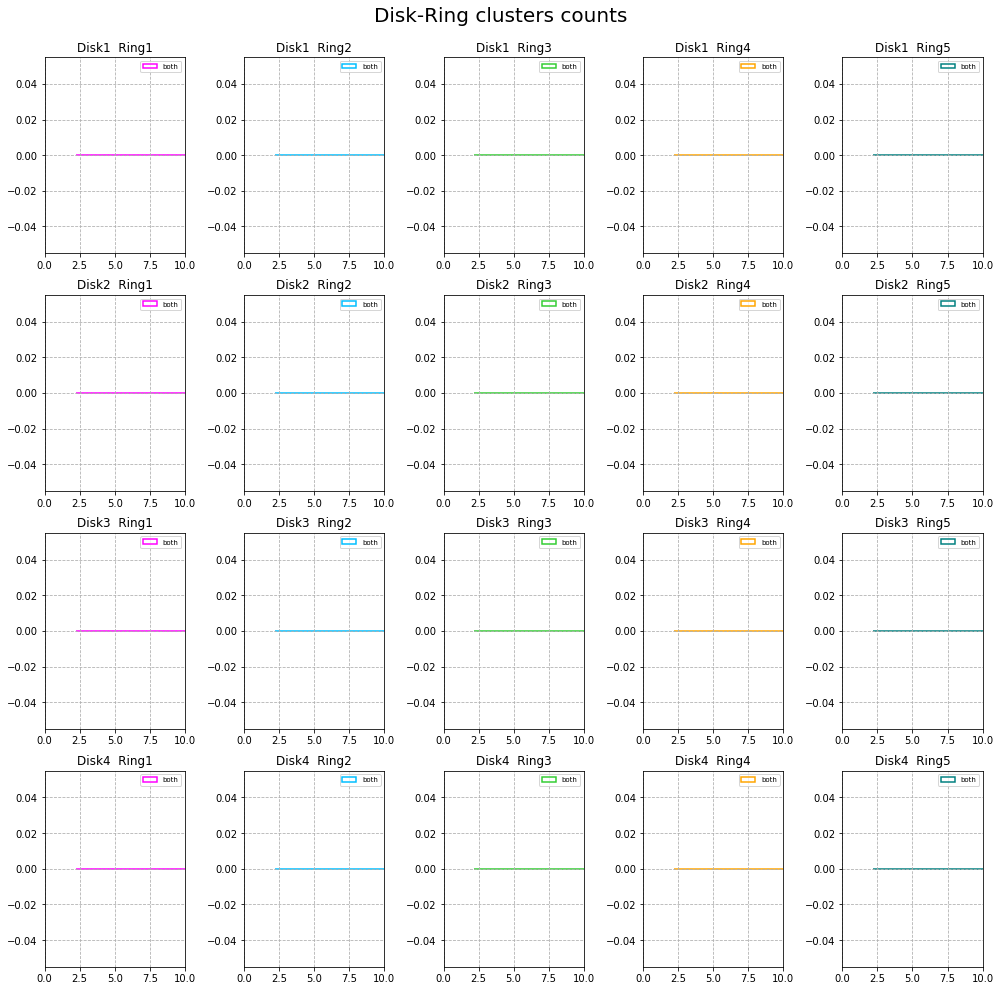

-------------- 1 -------------------


<Figure size 1008x1008 with 0 Axes>

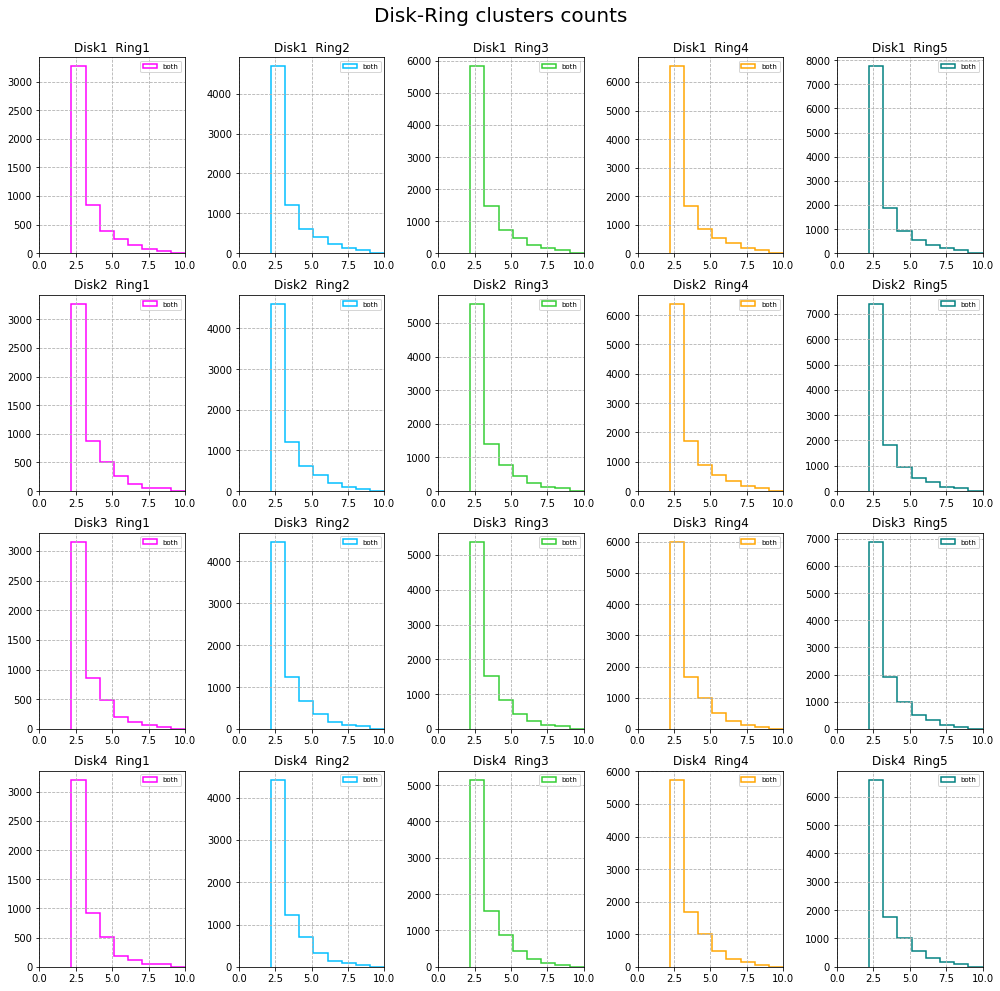

-------------- 2 -------------------


<Figure size 1008x1008 with 0 Axes>

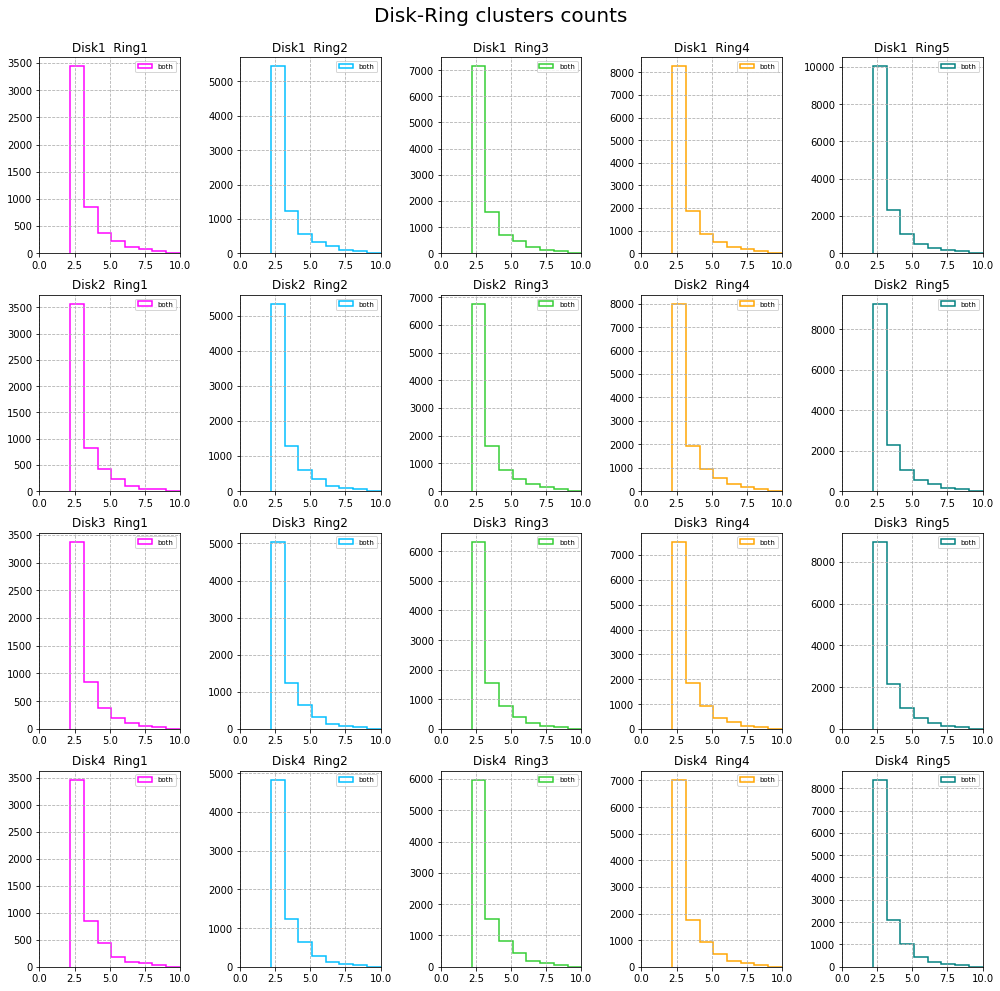

-------------- 10 -------------------


<Figure size 1008x1008 with 0 Axes>

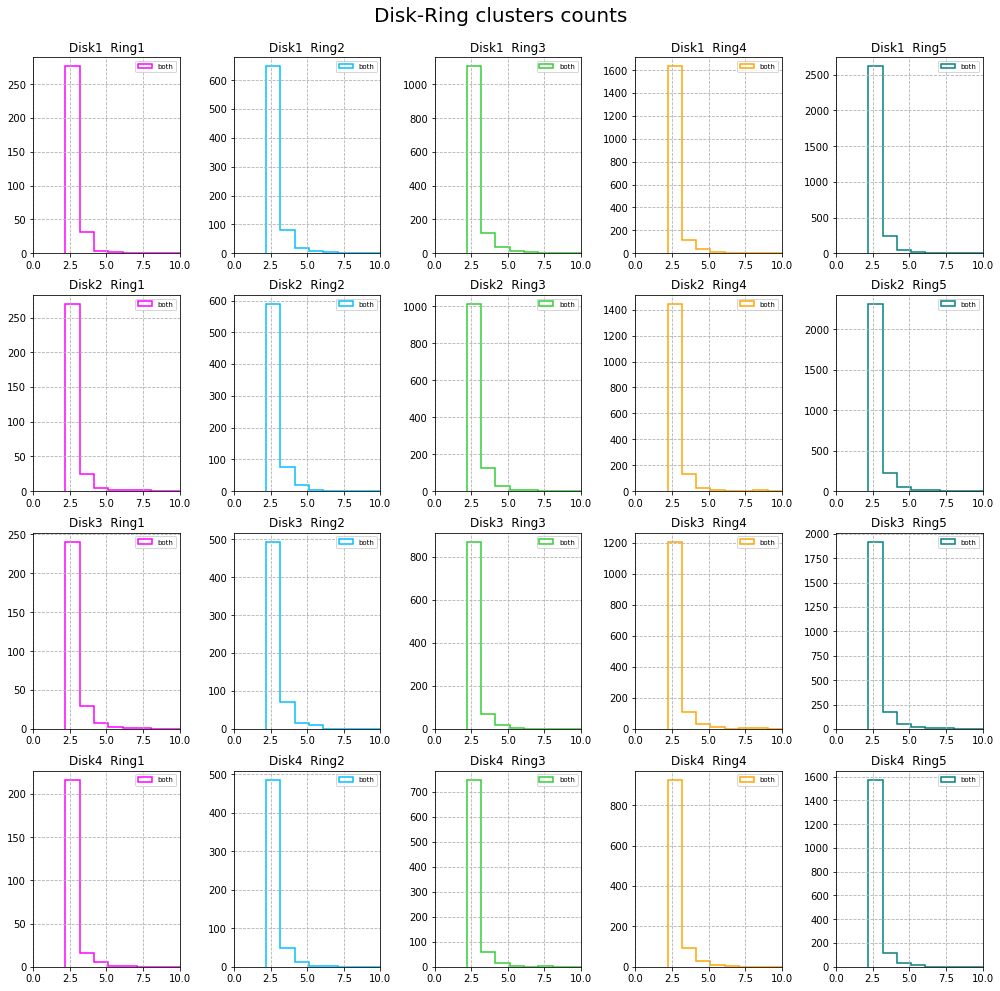

-------------- 20 -------------------


<Figure size 1008x1008 with 0 Axes>

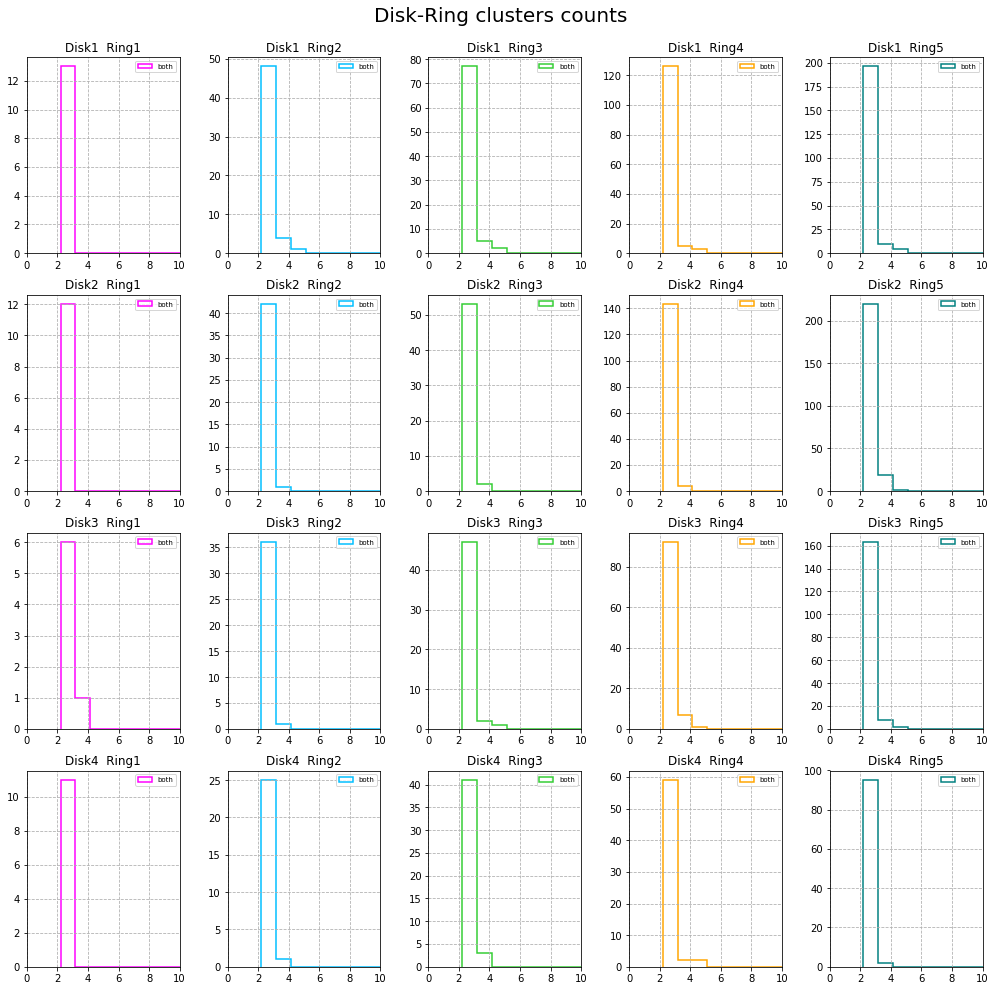

-------------- 30 -------------------


<Figure size 1008x1008 with 0 Axes>

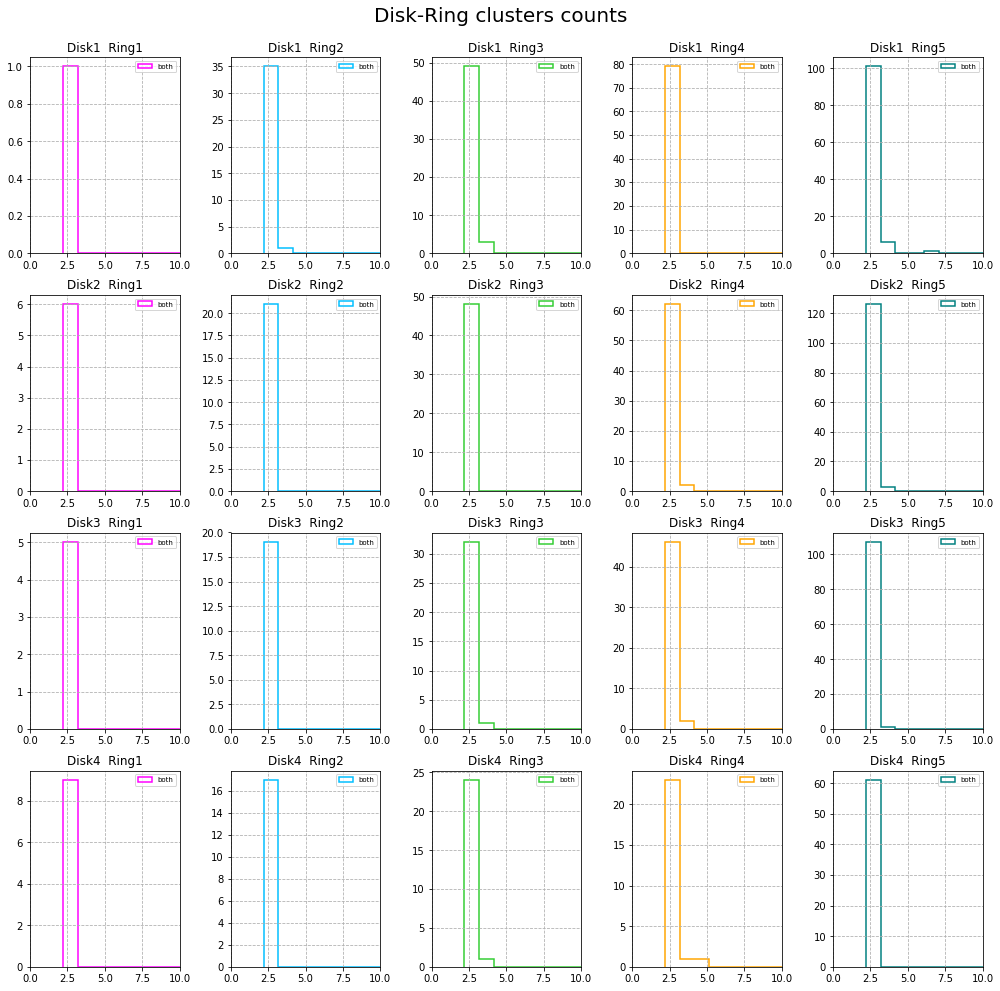

-------------- 50 -------------------


<Figure size 1008x1008 with 0 Axes>

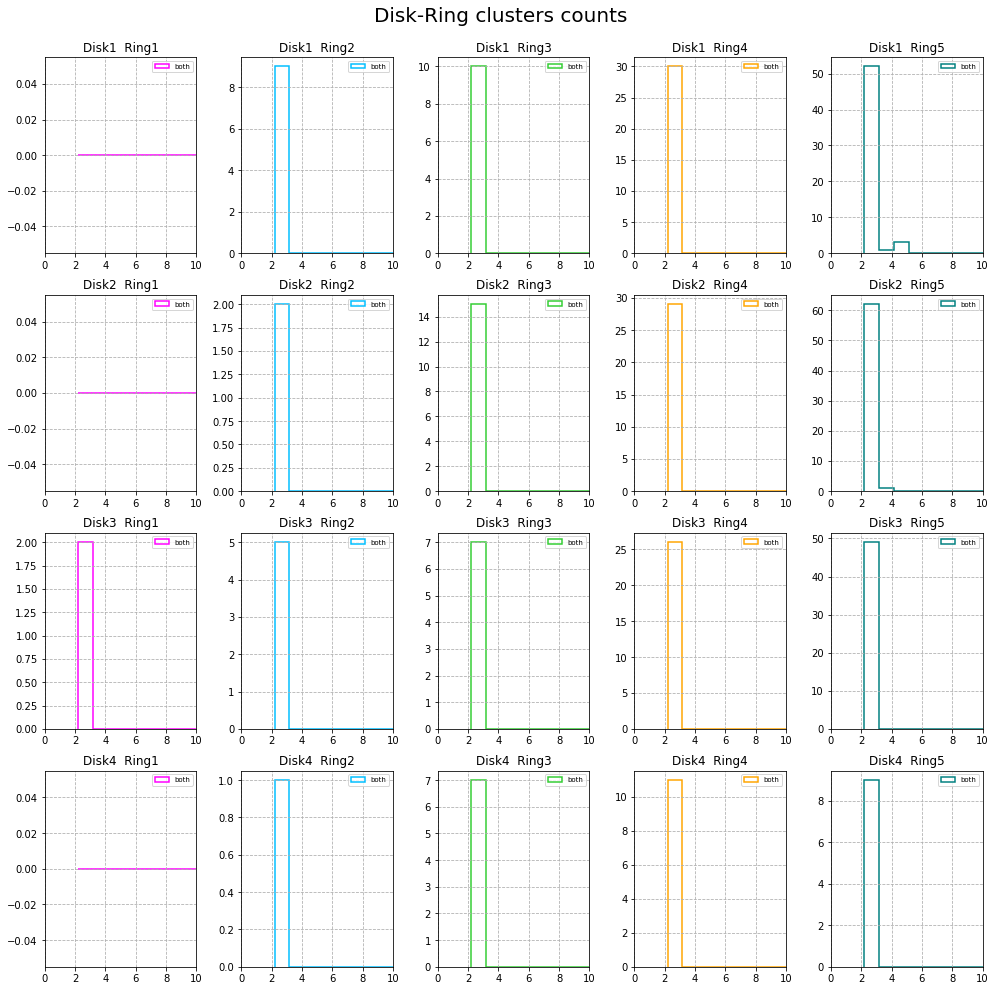

-------------- 75 -------------------


<Figure size 1008x1008 with 0 Axes>

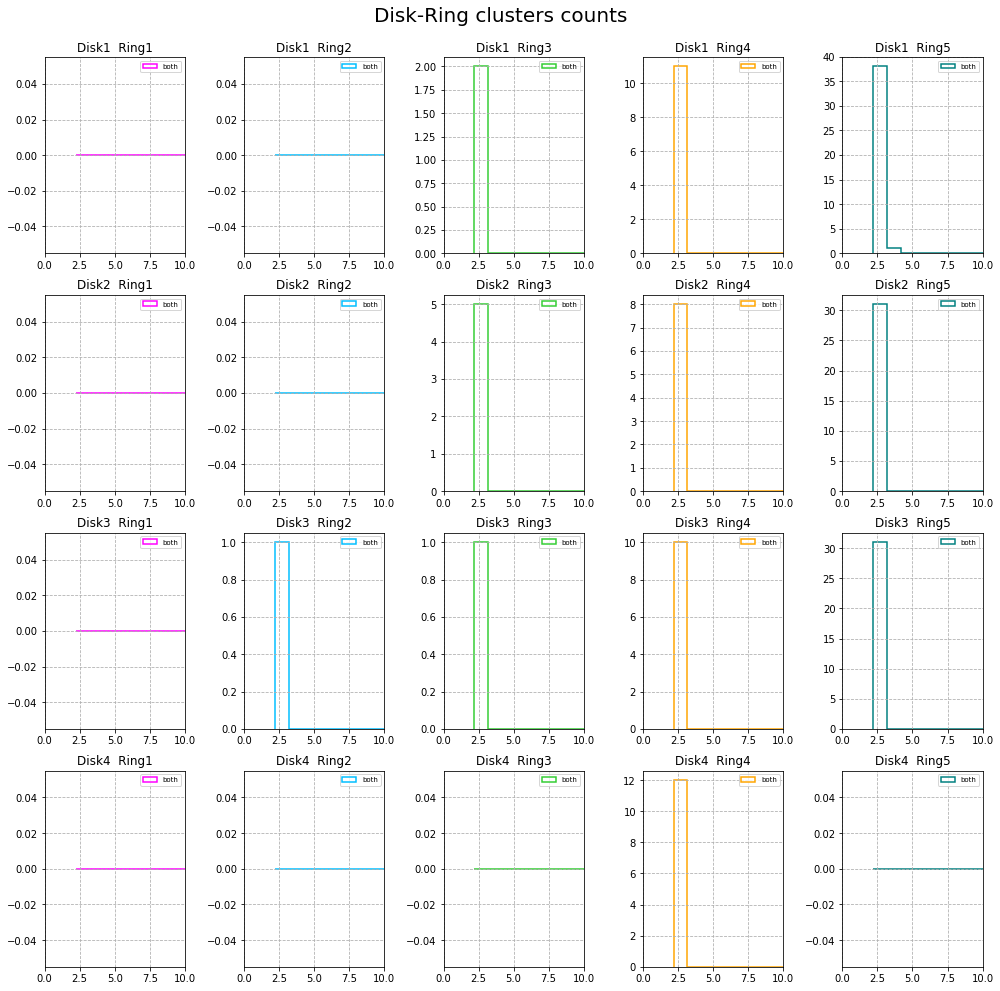

-------------- 100 -------------------


<Figure size 1008x1008 with 0 Axes>

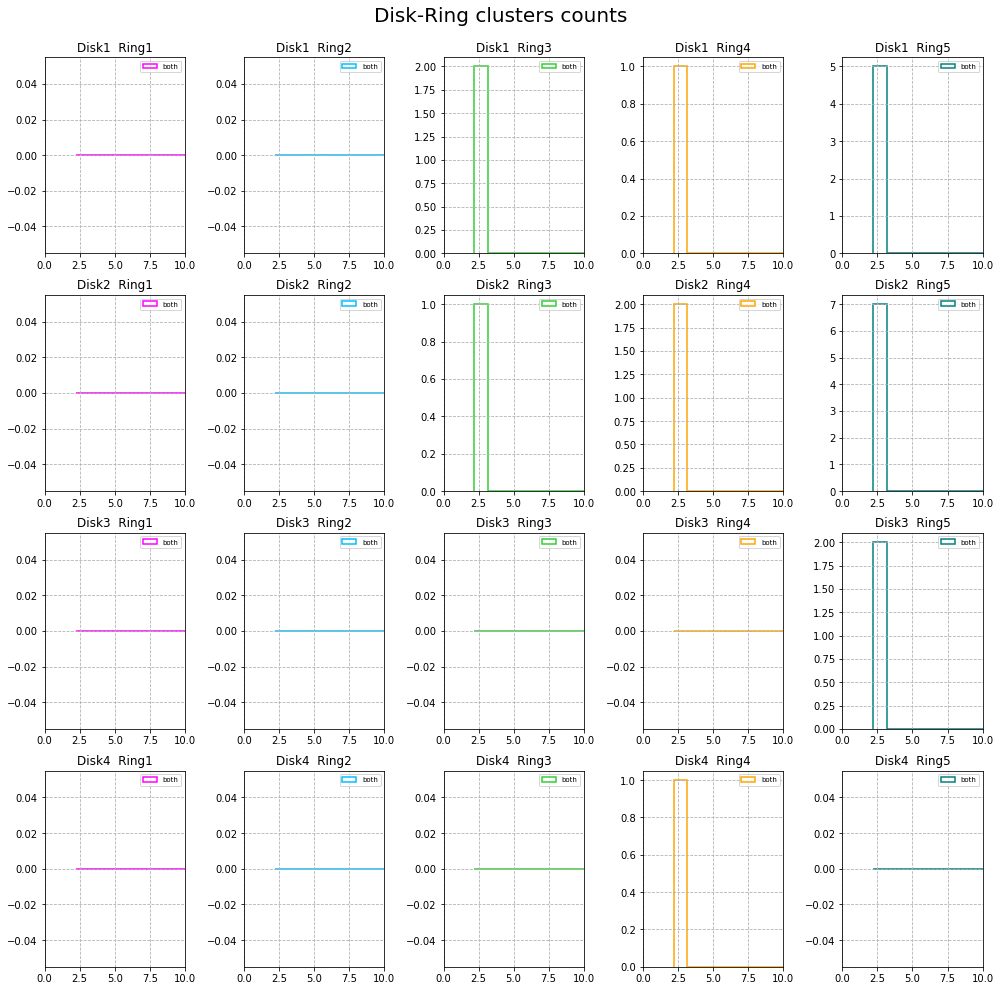

-------------- 140 -------------------


<Figure size 1008x1008 with 0 Axes>

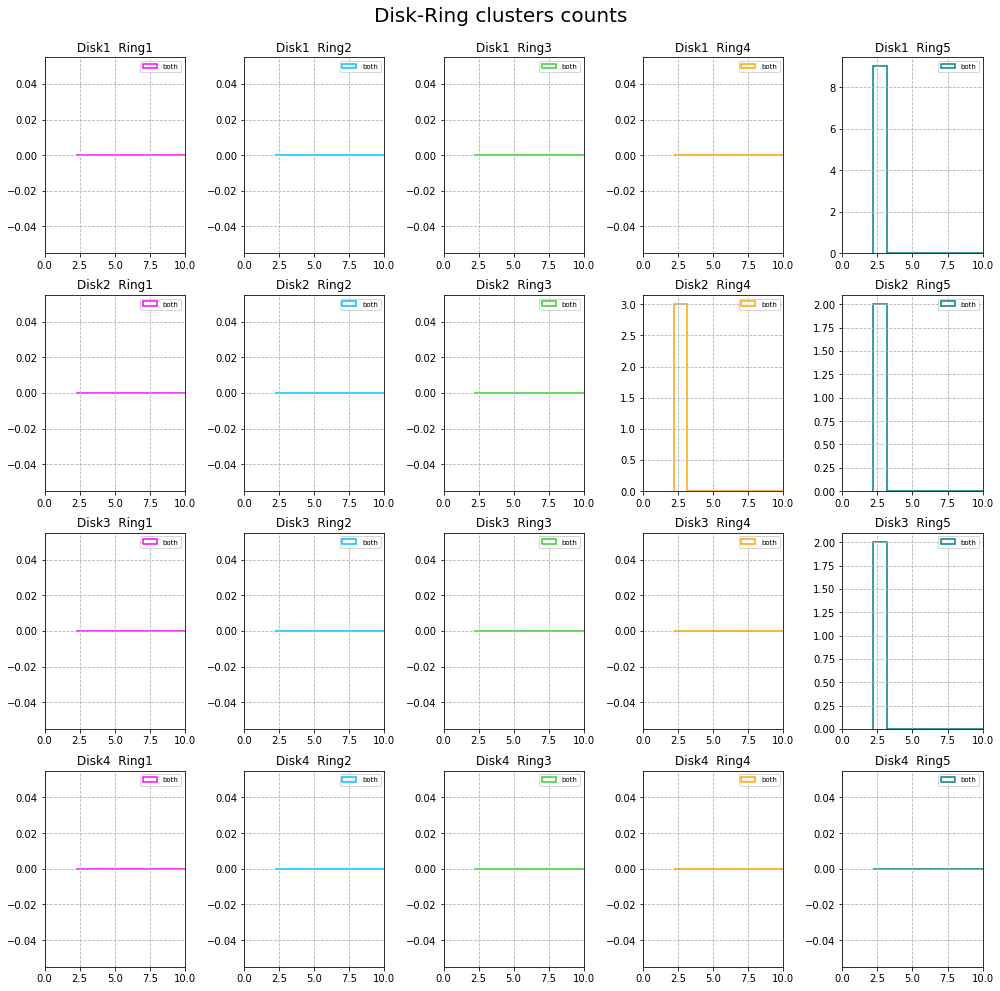

In [8]:
D = {}
hist = {}
for pu in PU:
    means[pu],D[pu],hist[pu] = PU_BRIL(pu,var,means)

In [11]:
means

{'0': {'Disk1': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None},
  'Disk2': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None},
  'Disk3': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None},
  'Disk4': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None}},
 '1': {'Disk1': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None},
  'Disk2': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None},
  'Disk3': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None},
  'Disk4': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None}},
 '2': {'Disk1': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
   'Ring5': None},
  'Disk2': {'Ring1': None,
   'Ring2': None,
   'Ring3': None,
   'Ring4': None,
  

[None None None None None None None None None None]


AttributeError: 'NoneType' object has no attribute 'sqrt'

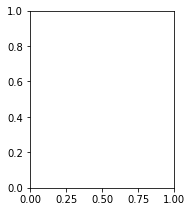

In [10]:
diskNum = 5
ringNum = 6

colors = ['magenta','deepskyblue','limegreen','orange','teal']
colorsP = ['magenta','deepskyblue','limegreen','orange','teal']
colorsM = ['r','b','g','y','cyan']

par0 = [0,10]
    
figFit = plt.figure(figsize=(15,15))
for i in range(1,diskNum):
    for j in range(1,ringNum):
        plt.subplot(diskNum-1,ringNum-1,diskNum*(i-1)+j)
        count = np.array([means[pu]['Disk'+str(i)]['Ring'+str(j)] for pu in PU])
        pu = [int(pu) for pu in PU]
        plt.errorbar(pu,count,
                     yerr = np.sqrt(count),
                     color=colorsP[j-1],
                     #ecolor = 'k',
                     marker='o',
                     linestyle='',
                     capthick = 1.2
                    )
        
        plt.title('Disk '+str(i) +' Ring '+str(j))
        ax = plt.gca()
        ax.set_xlabel('PU')
        plt.grid(linestyle='--')
        
        #-------------------------
        param, cov_matrix = curve_fit(poly, 
                                      pu,count,
                                      #sigma = np.sqrt(count),
                                      p0=[0,10])
        plt.plot(pu,poly(np.array(pu),*param),'--k')
        #-------------------------
        param, cov_matrix = curve_fit(poly, 
                                      pu[0:2],count[0:2],
                                      #sigma = np.sqrt(count),
                                      p0=[0,10])
        plt.plot(pu,poly(np.array(pu),*param),'--r')
        #-------------------------
        plt.text(5,int(plt.ylim()[1]*0.8), 
                 'Fit \n '+str(round(param[1],2))+'*x +' +str(round(param[0],2)),
                backgroundcolor = 'pink',)
        
        
plt.tight_layout()
figFit.savefig('/home/jcordero/CMS/BRIL/figs/'+str(var)+'/FIT_PU.png')

In [ ]:
'''
PU_var = '75'
file = TFile(DataFilePath+"summary_"+PU_var+".root")
hists = load_hist(file)
''';

In [ ]:
var = 'clusters'
feature = 'SizeY'
PU_V = ['0','1','2','20','30','50','75','100','140']#,'175','200']
col = ['purple','mediumorchid','magenta','r','coral','darkolivegreen','g','dodgerblue','b','teal','indigo']



for pu,n in zip(PU_V,range(len(PU_V))):
    print('----'+str(pu)+'-----')
    file = TFile(DataFilePath+"summary_PU_"+pu+".0.root")
    hists = load_hist(file)
    
    fig = plt.figure(figsize=(12,15))
    N = 1
    for i in range(1,5):    
        #print('XXXXXXXXXXXXXXXX')
        h = hists[var][feature+' of clusters for Disk '+str(i)]
        #m = h.ProjectionY()
        #plt.figure()
        #plt.hist(m)
        #plt.show()
        for j in range(1,6):
            y = [h.GetBinContent(j,ii) for ii in range(1,xlim[var][pu][j])]
            #plt.figure()
            x = [h.ProjectionY().GetBinCenter(jj) for jj in range(1,xlim[var][pu][j])]
            #[h.GetBinContent(j,ii) for ii in range(1,xlim[var][pu][j])]
            '''
            Y = []
            for k in range(len(y)):
                for yi in range(int(y[k])):
                    Y.append(x[k])  
            
            plt.subplot(6,5,N)
            plt.hist(Y,
                    color = col[n],
                    histtype = 'step',
                    linewidth = 1.5)
            ''';
            #'''
            plt.plot(y,
                     '--',
                     color = col[n],
                    )
            #''';
            N +=1;
            #ax = plt.gca()
            #ax.set_xlim([1,8])
            plt.grid(linestyle='--')
    plt.tight_layout()
    fig.savefig('/home/jcordero/CMS/BRIL/figs/Cluster'+feature+'_'+pu+'.png')
    plt.show()

# Num Clusters per Module

----1-----


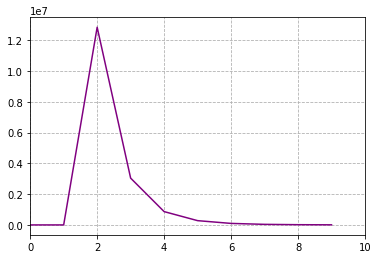

----2-----


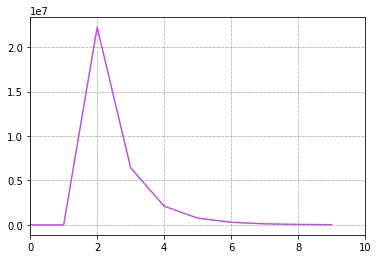

----20-----


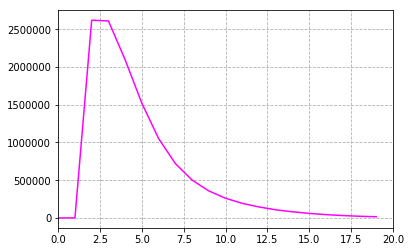

----30-----


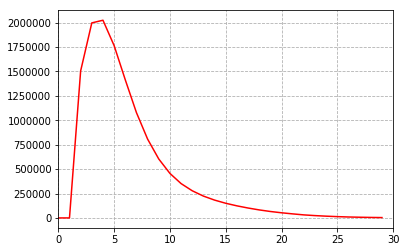

----50-----


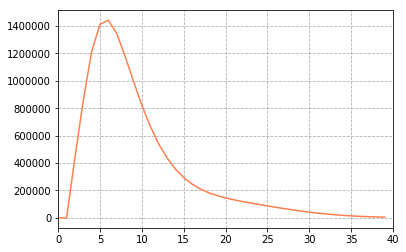

----75-----


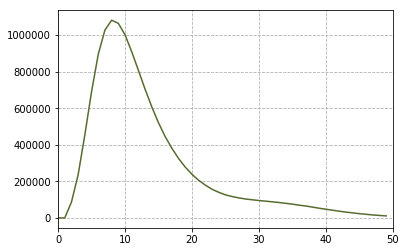

----100-----


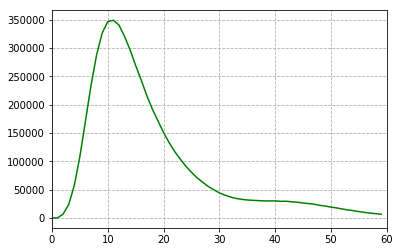

----140-----


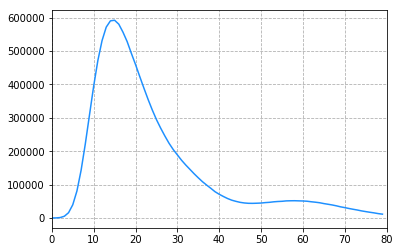

In [12]:
#PU_V = ['0','1']
PU_V = ['1','2','20','30','50','75','100','140']#,'175','200']
lim = [10,10,20,30,40,50,60,80,100,100,120]
col = ['purple','mediumorchid','magenta','r','coral','darkolivegreen','g','dodgerblue','b','teal','indigo']

for pu,n in zip(PU_V,range(len(PU_V))):
    print('----'+str(pu)+'-----')
    file = TFile(DataFilePath+"summary_PU_"+pu+".0.root")
    tree = file.Get("BRIL_IT_Analysis/perModule")
    perModule = tree.Get("Number of Clusters per module per event")
    clus = []
    for i in range(lim[n]):
        #if clu != 0: 
        clus.append(perModule.GetBinContent(i))
    #print(len(clus))
       
    '''
    param, cov_matrix = curve_fit(poiss, 
                                  xdata=list(np.arange(lim[n])),ydata=clus,
                                  #sigma = np.sqrt(count),
                                  #p0=[10,1],
                                 p0=[10,1e7],
                                 bounds = [[0,0],[30,np.inf]])
    
    #N, a, n, xb, sig = params
    p0 = [1e7,10,10,5,2]
    param, cov_matrix = curve_fit(CB, 
                              xdata=list(np.arange(lim[n])),ydata=clus,
                              #sigma = np.sqrt(count),
                              #p0=[10,1],
                             p0=p0,
                             #bounds = [[0,0],[30,np.inf]],
                                 )    
    ''';
    fig = plt.figure()
    plt.plot(clus,
            #bins = 10,
            #range = [0,60],
             #histtype = 'step',
             #linewidth = 1.5,
             color = col[n]
            )
    #plt.plot(np.arange(lim[n]),poiss(np.arange(lim[n]),*param),'--r')
    plt.grid(linestyle='--')
    ax = plt.gca()
    ax.set_xlim([0,lim[n]])
    plt.show()
    fig.savefig('/home/jcordero/CMS/BRIL/figs/NumClusPerModule_'+pu+'.png')

# Projection in R

---- PU 1-----
------- Disk 1 --------


/home/jcordero/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 7.95818476e-01 -4.32903802e+02  6.14559951e+07  1.28942620e+04]
[3.55738135e-01 6.24219617e+00 2.27029210e+04 7.46842002e+03]
------- Disk 2 --------
[2.19487304e-01 2.43349284e+00 3.84680890e+04 9.44869179e+03]
[2.72828963e-01 7.03175471e+00 2.01383334e+04 4.93528928e+03]
------- Disk 3 --------
[ 7.66179122e-01 -4.32915169e+02  6.14544037e+07  1.38006997e+04]
[2.99219085e-01 6.35563335e+00 2.30680965e+04 6.87835732e+03]
------- Disk 4 --------
[1.83013902e-01 3.86743979e+00 2.64793071e+04 9.66288756e+03]
[3.11998554e-01 6.31837780e+00 2.33364993e+04 7.82354877e+03]


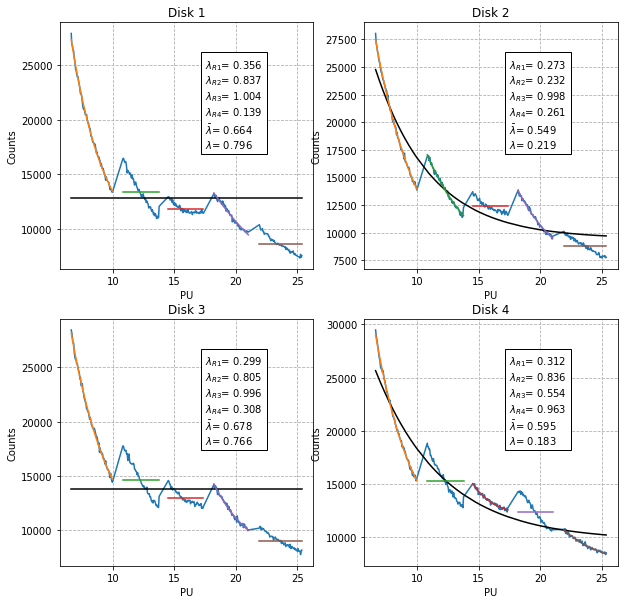

---- PU 2-----
------- Disk 1 --------
[ 5.85547749e-01 -4.32872097e+02  6.14604338e+07  2.59852396e+04]
[3.40107931e-01 3.60150405e+00 1.13596094e+05 1.41153055e+04]
------- Disk 2 --------
[ 5.41887089e-01 -4.32889816e+02  6.14579532e+07  2.67839137e+04]
[2.79426918e-01 8.20270017e+00 2.87600198e+04 1.06257322e+04]
------- Disk 3 --------
[ 5.24874833e-01 -4.32894799e+02  6.14572555e+07  2.77821054e+04]
[2.86393847e-01 6.60687968e+00 4.40829322e+04 1.27266174e+04]
------- Disk 4 --------
[1.83569427e-01 3.31862347e+00 5.89824489e+04 1.95319489e+04]
[3.30359201e-01 7.98666088e+00 2.65382420e+04 1.70759144e+04]


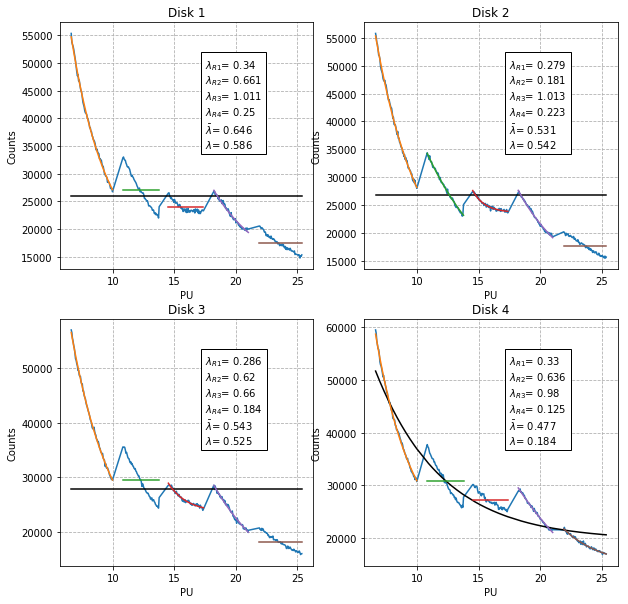

---- PU 20-----
------- Disk 1 --------
[ 5.81232421e-01 -4.32872542e+02  6.14603715e+07  2.60829297e+04]
[3.44092454e-01 3.46226597e+00 1.20069482e+05 1.45626339e+04]
------- Disk 2 --------
[ 5.39455094e-01 -4.32888856e+02  6.14580875e+07  2.68853227e+04]
[2.78997509e-01 6.19313415e+00 5.10433658e+04 1.04247001e+04]
------- Disk 3 --------
[ 5.26398800e-01 -4.32891816e+02  6.14576732e+07  2.78838147e+04]
[3.07818455e-01 6.32819009e+00 4.64176799e+04 1.46785969e+04]
------- Disk 4 --------
[1.85715977e-01 6.55514590e+00 3.28311460e+04 1.96437691e+04]
[3.34072873e-01 8.16747064e+00 2.48397974e+04 1.74447817e+04]


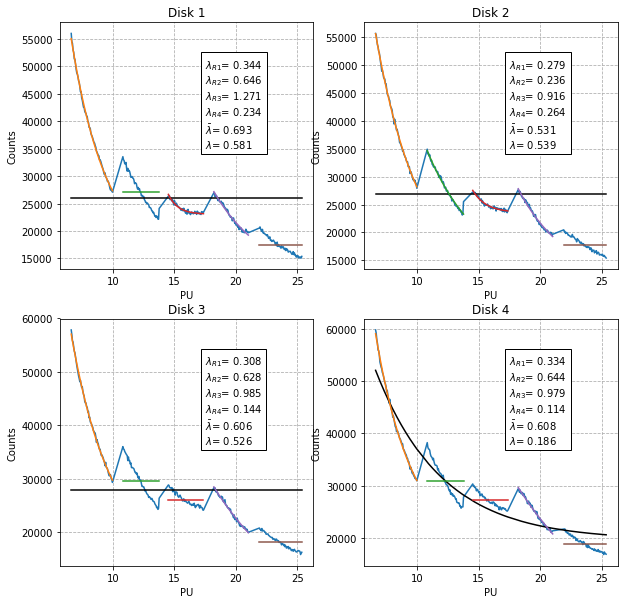

---- PU 30-----
------- Disk 1 --------
[ 3.75772374e-01 -4.32842275e+02  6.14646089e+07  3.89253482e+04]
[3.40009068e-01 9.02568804e+00 2.67196524e+04 2.13897765e+04]
------- Disk 2 --------
[ 3.15271803e-01 -4.32864513e+02  6.14614957e+07  4.01314441e+04]
[2.77503272e-01 8.64981671e+00 3.85399043e+04 1.53829420e+04]
------- Disk 3 --------
[ 2.89401860e-01 -4.32873224e+02  6.14602757e+07  4.16489137e+04]
[2.89566173e-01 6.71212987e+00 6.35460047e+04 1.96110445e+04]
------- Disk 4 --------
[1.83801113e-01 4.27067524e+00 7.42048107e+04 2.93079476e+04]
[3.18793526e-01 8.57248670e+00 3.40594781e+04 2.43784160e+04]


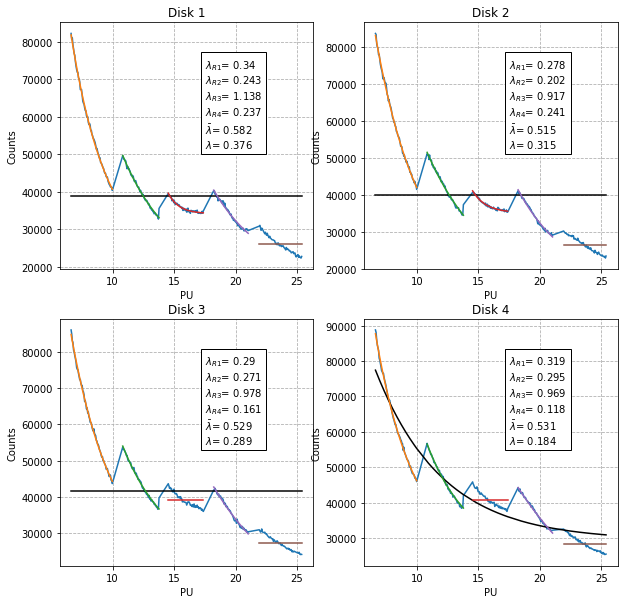

---- PU 50-----
------- Disk 1 --------
[2.59714498e-01 6.02835926e+00 8.82512957e+04 4.83791790e+04]
[3.57151185e-01 1.03818752e+01 2.58224611e+04 3.80379586e+04]
------- Disk 2 --------
[2.18736014e-01 7.06803790e+00 6.98525609e+04 4.73631799e+04]
[2.69324407e-01 1.20472302e+01 2.64479123e+04 2.37416729e+04]
------- Disk 3 --------
[1.91334510e-01 4.11184414e+00 1.26804037e+05 4.71181005e+04]
[2.93300741e-01 9.68761709e+00 4.36750086e+04 3.36726449e+04]
------- Disk 4 --------
[1.83740730e-01 5.16002569e+00 1.04689777e+05 4.86659055e+04]
[3.14011067e-01 1.03898065e+01 3.24572566e+04 3.97164271e+04]


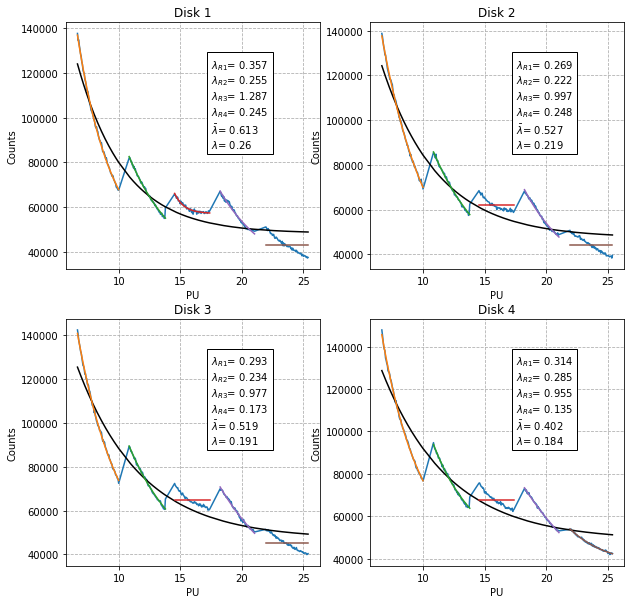

---- PU 75-----
------- Disk 1 --------
[-5.48002579e-01  4.44184134e+02 -6.12767484e+07  9.70962716e+04]
[3.52779053e-01 9.70057111e+00 5.02539310e+04 5.62049714e+04]
------- Disk 2 --------
[-7.15540346e-01  4.44116816e+02 -6.12861728e+07  1.00036697e+05]
[2.76958639e-01 1.17076993e+01 4.12752587e+04 3.82727960e+04]
------- Disk 3 --------
[-7.74786772e-01  4.44099423e+02 -6.12886080e+07  1.03878201e+05]
[2.97001525e-01 1.31322464e+01 2.32082293e+04 5.15305677e+04]
------- Disk 4 --------
[-7.75069592e-01  4.44118718e+02 -6.12859066e+07  1.07996131e+05]
[3.22965612e-01 1.22105621e+01 2.58552023e+04 6.18363610e+04]


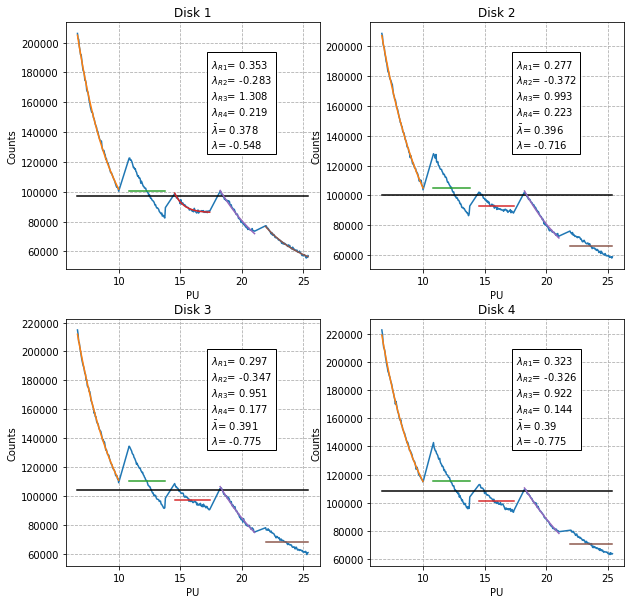

---- PU 100-----
------- Disk 1 --------
[ 1.66912674e-01 -4.32811464e+02  6.14689225e+07  5.17331406e+04]
[3.32795141e-01 1.04882726e+01 2.25342807e+04 2.72939548e+04]
------- Disk 2 --------
[ 8.52907879e-02 -4.32843592e+02  6.14644246e+07  5.32706326e+04]
[2.76449973e-01 9.60790886e+00 3.92425926e+04 2.05409370e+04]
------- Disk 3 --------
[ 1.92409950e-01 -2.84163089e+01  5.31339362e+07  3.77277205e+04]
[3.12531425e-01 1.01447183e+01 2.76343576e+04 3.00148370e+04]
------- Disk 4 --------
[ 1.83252827e-01 -3.12002825e+01  6.54939570e+07  3.88509905e+04]
[3.03448699e-01 1.02629082e+01 2.86546812e+04 2.98193961e+04]


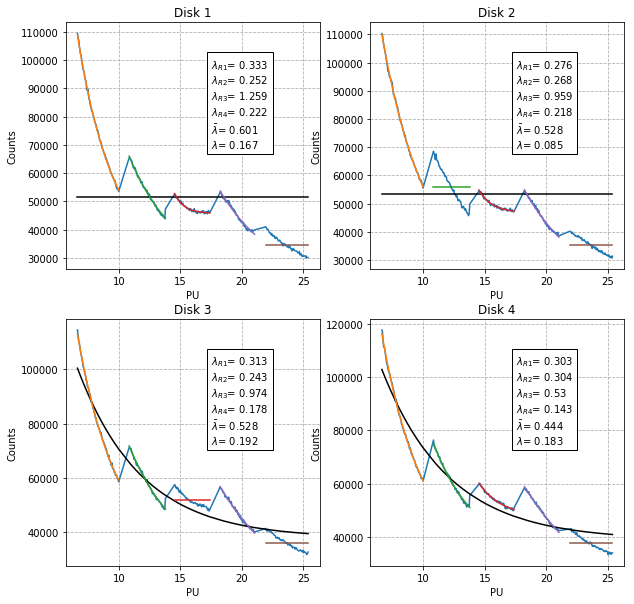

---- PU 140-----
------- Disk 1 --------
[-1.51690291e+00  4.44342009e+02 -6.12546458e+07  1.58224016e+05]
[3.56612649e-01 1.12793009e+01 4.58688298e+04 9.29417035e+04]
------- Disk 2 --------
[-1.80330329e+00  4.44224178e+02 -6.12711424e+07  1.63054703e+05]
[-4.58999705e+00  6.35940678e+01  7.87185114e+04  2.41677971e+05]
------- Disk 3 --------
[-1.89524842e+00  4.44196239e+02 -6.12750539e+07  1.69238406e+05]
[-4.56099529e+00  6.64109609e+01  7.79640783e+04  2.49518868e+05]
------- Disk 4 --------
[-1.90986190e+00  4.44224779e+02 -6.12710585e+07  1.76046594e+05]
[-4.06488607e+00  6.34804762e+01  7.77705037e+04  2.57530250e+05]


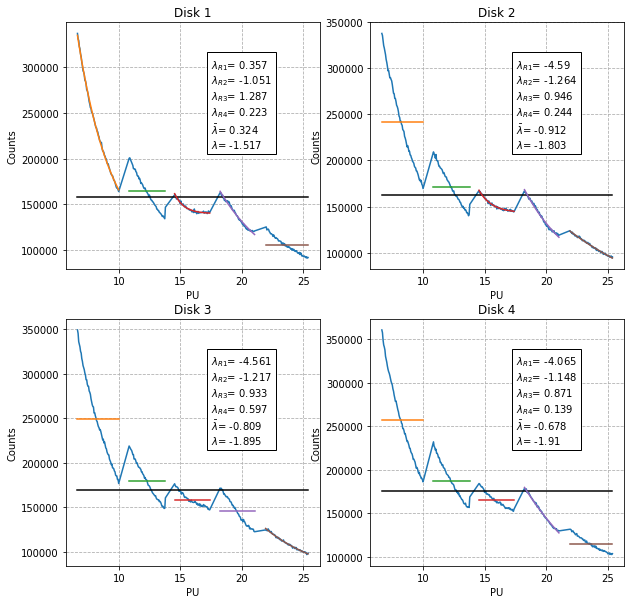

---- PU 175-----
------- Disk 1 --------
[-2.58944315e+00  4.44512387e+02 -6.12307933e+07  2.25660831e+05]
[3.57766638e-01 8.40745372e+00 1.81314501e+05 1.33306960e+05]
------- Disk 2 --------
[-2.97237349e+00  4.44360244e+02 -6.12520933e+07  2.32573974e+05]
[2.83379361e-01 1.11904301e+01 1.05988423e+05 9.47881241e+04]
------- Disk 3 --------
[-3.13142233e+00  4.44305788e+02 -6.12597172e+07  2.41409319e+05]
[2.88100304e-01 1.13728701e+01 9.64096781e+04 1.12781408e+05]
------- Disk 4 --------
[-3.14654576e+00  4.44344964e+02 -6.12542325e+07  2.51084770e+05]
[3.16145001e-01 1.24447170e+01 5.84853671e+04 1.39738452e+05]


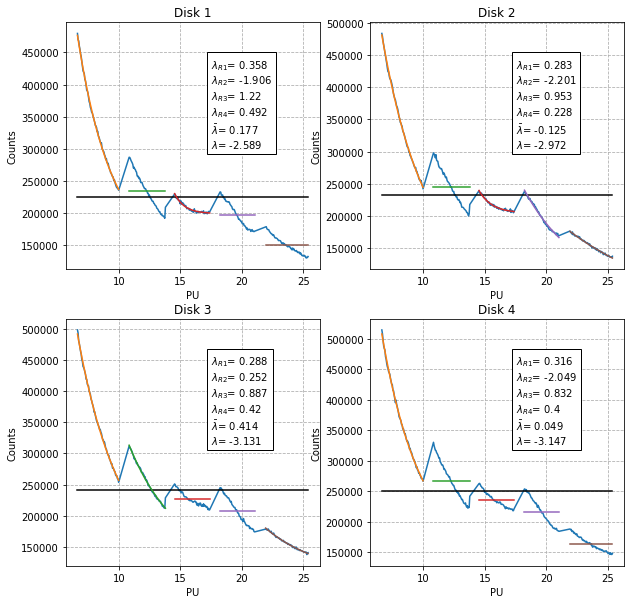

---- PU 200-----
------- Disk 1 --------
[-1.35367095e+00  4.44308926e+02 -6.12592775e+07  1.47298045e+05]
[3.51848161e-01 9.64297019e+00 7.81294244e+04 8.49206252e+04]
------- Disk 2 --------
[-1.60935305e+00  4.44205820e+02 -6.12737124e+07  1.51777898e+05]
[-4.64652026e+00  5.57675760e+01  8.04973126e+04  2.25070794e+05]
------- Disk 3 --------
[-1.69233704e+00  4.44180809e+02 -6.12772139e+07  1.57545626e+05]
[-4.61505500e+00  6.08569789e+01  7.99453200e+04  2.32287765e+05]
------- Disk 4 --------
[-1.70696850e+00  4.44206064e+02 -6.12736782e+07  1.63880166e+05]
[-4.59235632e+00  6.38036658e+01  7.89883907e+04  2.39706735e+05]


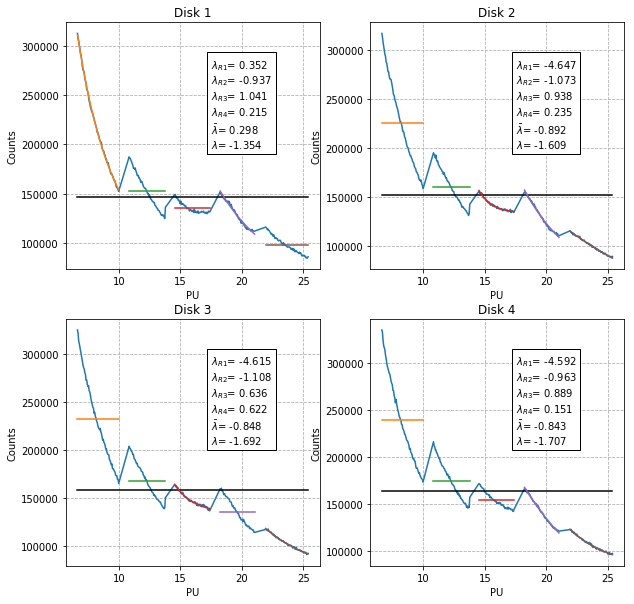

In [13]:
#PU_V = ['0','1']
#PU_V = ['10']
PU_V = ['1','2','20','30','50','75','100','140','175','200']
lim = [10,10,20,30,40,50,60,80,100,100,120]
col = ['purple','mediumorchid','magenta','r','coral','darkolivegreen','g','dodgerblue','b','teal','indigo']


DxBins = {
         -4:[343,343+15],
         -3:[686,686+15],
         -2:[984,984+15],
         -1:[1243,1243+15],
          1:[4726,4775],
          2:[4991,5040],
          3:[5286,5335],
          4:[5631,5680]
         }
RyCm = {
        1:[6.6,10],
        2:[10.8,13.8],
        3:[14.5,17.4],
        4:[18.2,21.05],
        5:[21.9,25.4]
       }# avoiding the overlap
P0  = {
        1:[0.1,RyCm[1][0], 25000,0],
        2:[1  ,RyCm[2][0], 30000,0],
        3:[1  ,RyCm[3][0],140000,0],
        4:[1  ,RyCm[4][0],140000,0],
        5:[1  ,RyCm[5][0],140000,0]
        }

#Dindex = [-4,-3,-2,-1,1,2,3,4]
Dindex = [1,2,3,4]
lamb = {}
lambR1 = {}
N = {}
for pu,n in zip(PU_V,range(len(PU_V))):
    print('---- PU '+str(pu)+'-----')

    file = TFile(DataFilePath+"summary_PU_"+pu+".0.root")
    tree = file.Get("BRIL_IT_Analysis/Clusters")
    R = tree.Get("RVsZ")

    lamb[pu] = {}
    lambR1[pu] = {}
    N[pu] = {}
    
    fig = plt.figure(figsize=(10,10))
    for d in Dindex:
        print('------- Disk '+str(d)+' --------')
        lamb[pu][d] = []
        lambR1[pu][d] = []
        N[pu][d] = []
        test = []
        x = []
        for i in range(100,600):
            count = 0
            count += R.ProjectionY('_py',DxBins[d][0],DxBins[d][1]).GetBinContent(i)
            count += R.ProjectionY('_py',DxBins[-d][0],DxBins[-d][1]).GetBinContent(i)
            x.append(R.ProjectionY('_py',DxBins[d][0],DxBins[d][1]).GetBinCenter(i))        
            test.append(count)

        mask = np.zeros(len(x))
        pars = []
        xP = []
        maskR = []
        for r in range(1,6):
            maskR.append((np.array(x) > RyCm[r][0]) & (np.array(x) < RyCm[r][1]))
            #maskR.append((np.array(x) > 0))
            mask += maskR[r-1]

            maskR[r-1] = np.array(maskR[r-1],dtype=bool) 
            xP.append(np.array(x)[maskR[r-1]])
            testP = np.array(test)[maskR[r-1]]
            param, cov_matrix = curve_fit(
                                          exp, 
                                          xdata = xP[r-1],
                                          ydata = testP,
                                          p0=P0[r],
                                          #bounds = [[0,0],[30,np.inf]],
                                         ) 
            pars.append(param)
            N[pu][d].append(sum(testP))

        mask = np.array(mask,dtype=bool)
        x = np.array(x)[mask]
        test = np.array(test)[mask]


        param, cov_matrix = curve_fit(
                                      exp, 
                                      xdata = x,
                                      ydata = test,
                                      p0=[1,6,140000,0],
                                      #bounds = [[0,0],[30,np.inf]],
                                     )  

        print(param)
        print(pars[0])
        
        plt.subplot(2,2,d)
        plt.plot(x,test)
        plt.plot(x,exp(x,*param),'-k')
        [plt.plot(xP[r-1],exp(xP[r-1],*pars[r-1])) for r in range(1,6)]
        ax = plt.gca()
        ax.set_xlabel('PU')
        ax.set_ylabel('Counts')
        plt.title('Disk '+str(d))
        plt.grid(linestyle='--')

        yrange = ax.get_ylim()
        
        meanLamb = sum([p[0] for p in pars])/len(pars)
        plt.text(17.5,(yrange[1]-yrange[0])*0.5 + yrange[0],
                 r'$\lambda_{R1}$= '+str(round(pars[0][0],3))+'\n'
                 r'$\lambda_{R2}$= '+str(round(pars[1][0],3))+'\n'
                 r'$\lambda_{R3}$= '+str(round(pars[2][0],3))+'\n'
                 r'$\lambda_{R4}$= '+str(round(pars[3][0],3))+'\n'
                 r'$\bar{\lambda}$= '+str(round(meanLamb,3))+'\n'
                 r'$\lambda$= '+str(round(param[0],3)),
                 bbox=dict(facecolor = 'white')
                )        
        
        
        lamb[pu][d].append(meanLamb)
        lambR1[pu][d].append(pars[0][0])

    fig.savefig('/home/jcordero/CMS/BRIL/figs/RVsZ_projY_'+pu+'_'+str(d)+'.png')
    plt.show()
    

---- PU 1-----
------- Disk 1 --------
[2.16736870e-01 4.81948773e-01 1.03936570e+03 4.04478920e+01]
------- Disk 2 --------
[2.16736870e-01 4.81948773e-01 1.03936570e+03 4.04478920e+01]
------- Disk 3 --------
[2.16736870e-01 4.81948773e-01 1.03936570e+03 4.04478920e+01]
------- Disk 4 --------
[2.16736870e-01 4.81948773e-01 1.03936570e+03 4.04478920e+01]


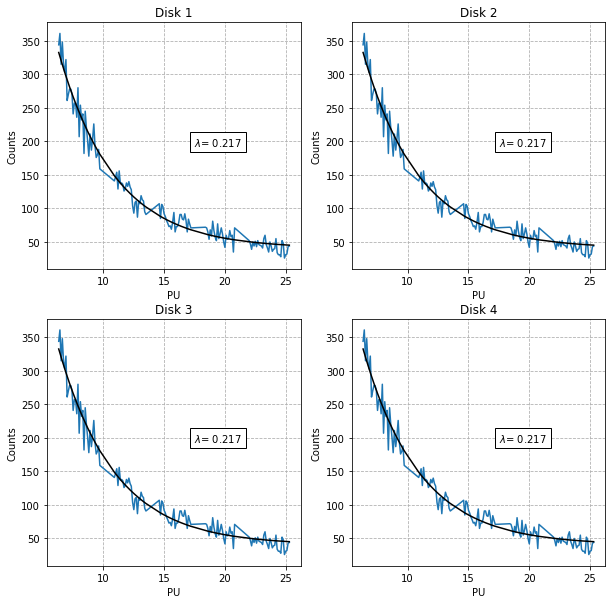

---- PU 2-----
------- Disk 1 --------
[2.35845311e-01 3.40731501e+00 1.20659471e+03 9.11928151e+01]
------- Disk 2 --------
[2.35845311e-01 3.40731501e+00 1.20659471e+03 9.11928151e+01]
------- Disk 3 --------
[2.35845311e-01 3.40731501e+00 1.20659471e+03 9.11928151e+01]
------- Disk 4 --------
[2.35845311e-01 3.40731501e+00 1.20659471e+03 9.11928151e+01]


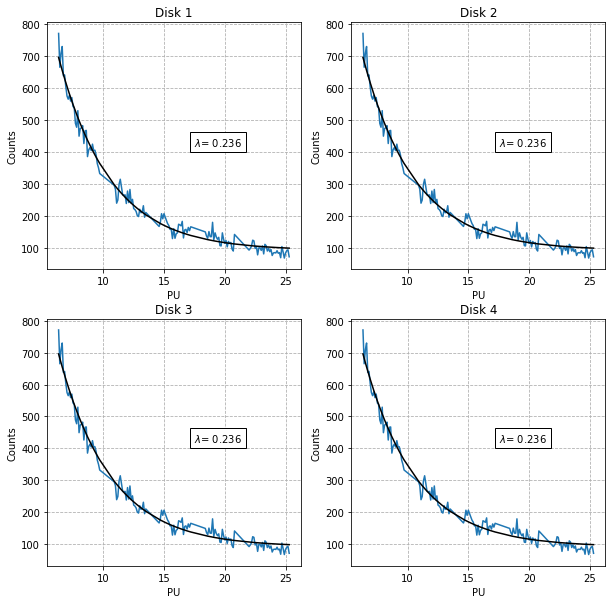

---- PU 20-----
------- Disk 1 --------
[2.26651600e-01 3.31475227e+00 1.19535693e+03 8.56827826e+01]
------- Disk 2 --------
[2.26651600e-01 3.31475227e+00 1.19535693e+03 8.56827826e+01]
------- Disk 3 --------
[2.26651600e-01 3.31475227e+00 1.19535693e+03 8.56827826e+01]
------- Disk 4 --------
[2.26651600e-01 3.31475227e+00 1.19535693e+03 8.56827826e+01]


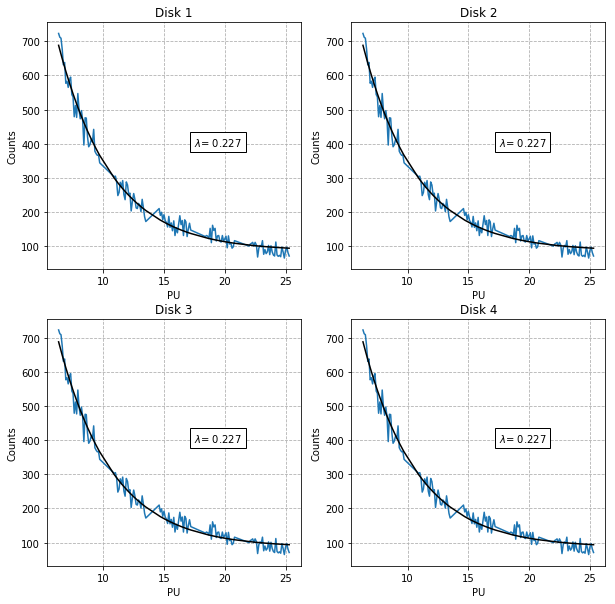

---- PU 30-----
------- Disk 1 --------
[2.32693556e-01 5.31504430e+00 1.13841387e+03 1.32810962e+02]
------- Disk 2 --------
[2.32693556e-01 5.31504430e+00 1.13841387e+03 1.32810962e+02]
------- Disk 3 --------
[2.32693556e-01 5.31504430e+00 1.13841387e+03 1.32810962e+02]
------- Disk 4 --------
[2.32693556e-01 5.31504430e+00 1.13841387e+03 1.32810962e+02]


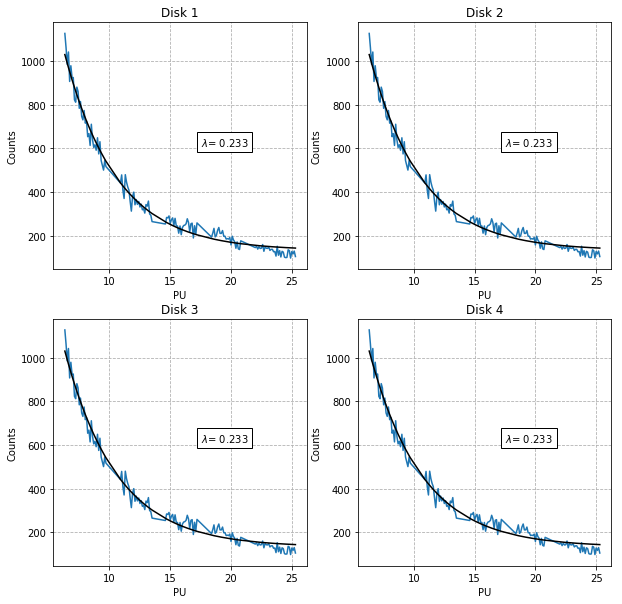

---- PU 50-----
------- Disk 1 --------
[2.19573385e-01 6.95488187e+00 1.28214187e+03 2.07752338e+02]
------- Disk 2 --------
[2.19573385e-01 6.95488187e+00 1.28214187e+03 2.07752338e+02]
------- Disk 3 --------
[2.19573385e-01 6.95488187e+00 1.28214187e+03 2.07752338e+02]
------- Disk 4 --------
[2.19573385e-01 6.95488187e+00 1.28214187e+03 2.07752338e+02]


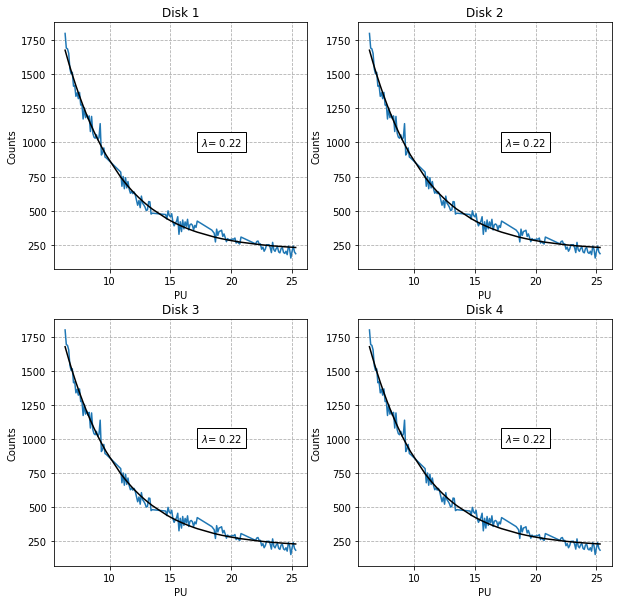

---- PU 75-----
------- Disk 1 --------
[2.28281055e-01 1.14412566e+01 6.91749876e+02 3.27361793e+02]
------- Disk 2 --------
[2.28281055e-01 1.14412566e+01 6.91749876e+02 3.27361793e+02]
------- Disk 3 --------
[2.28281055e-01 1.14412566e+01 6.91749876e+02 3.27361793e+02]
------- Disk 4 --------
[2.28281055e-01 1.14412566e+01 6.91749876e+02 3.27361793e+02]


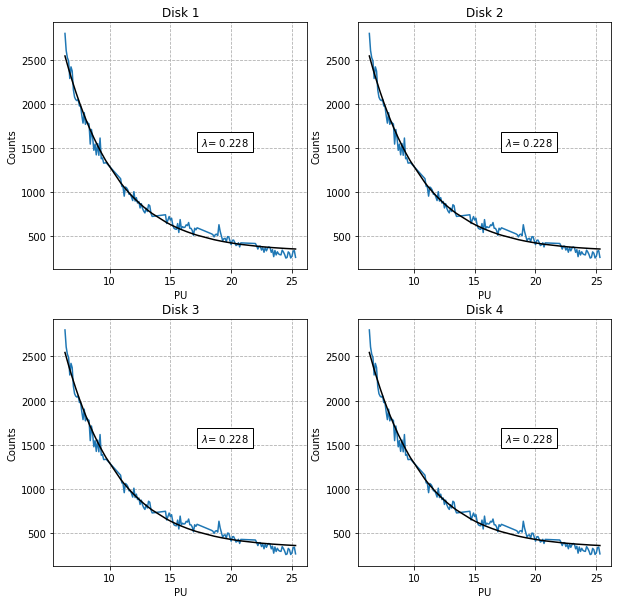

---- PU 100-----
------- Disk 1 --------
[2.24359758e-01 6.49822332e+00 1.13834602e+03 1.73426290e+02]
------- Disk 2 --------
[2.24359758e-01 6.49822332e+00 1.13834602e+03 1.73426290e+02]
------- Disk 3 --------
[2.24359758e-01 6.49822332e+00 1.13834602e+03 1.73426290e+02]
------- Disk 4 --------
[2.24359758e-01 6.49822332e+00 1.13834602e+03 1.73426290e+02]


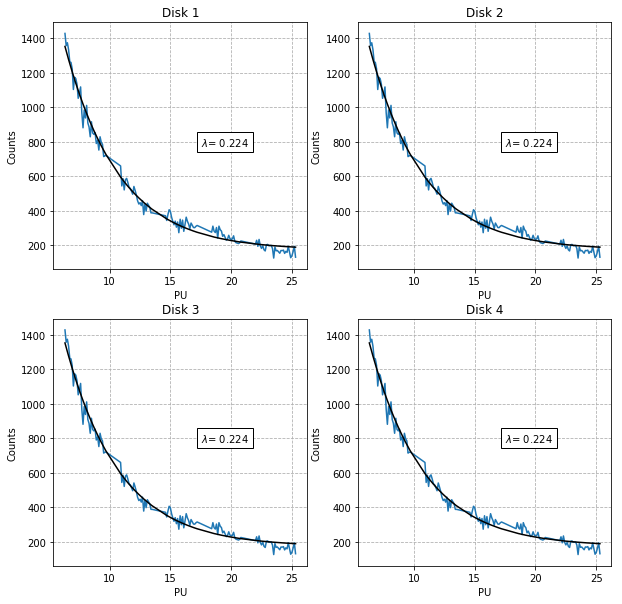

---- PU 140-----
------- Disk 1 --------
[2.29123527e-01 1.24632006e+01 8.92689669e+02 5.34712943e+02]
------- Disk 2 --------
[2.29123527e-01 1.24632006e+01 8.92689669e+02 5.34712943e+02]
------- Disk 3 --------
[2.29123527e-01 1.24632006e+01 8.92689669e+02 5.34712943e+02]
------- Disk 4 --------
[2.29123527e-01 1.24632006e+01 8.92689669e+02 5.34712943e+02]


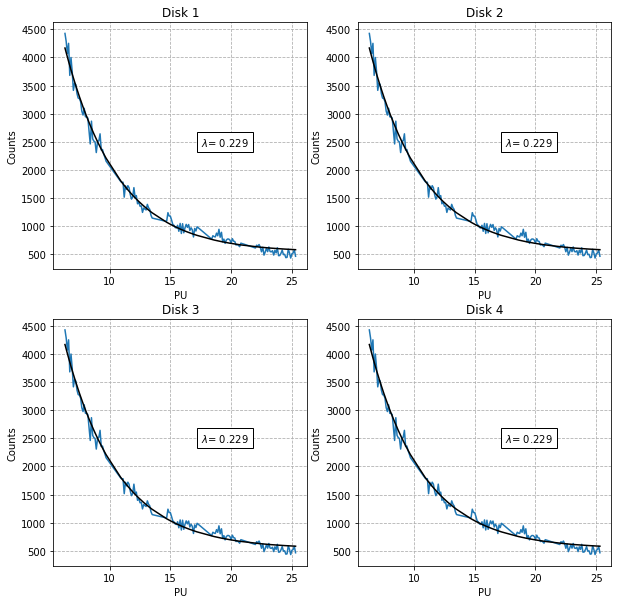

---- PU 175-----
------- Disk 1 --------
[2.27772725e-01 1.57295830e+01 6.08915656e+02 7.60711567e+02]
------- Disk 2 --------
[2.27772725e-01 1.57295830e+01 6.08915656e+02 7.60711567e+02]
------- Disk 3 --------
[2.27772725e-01 1.57295830e+01 6.08915656e+02 7.60711567e+02]
------- Disk 4 --------
[2.27772725e-01 1.57295830e+01 6.08915656e+02 7.60711567e+02]


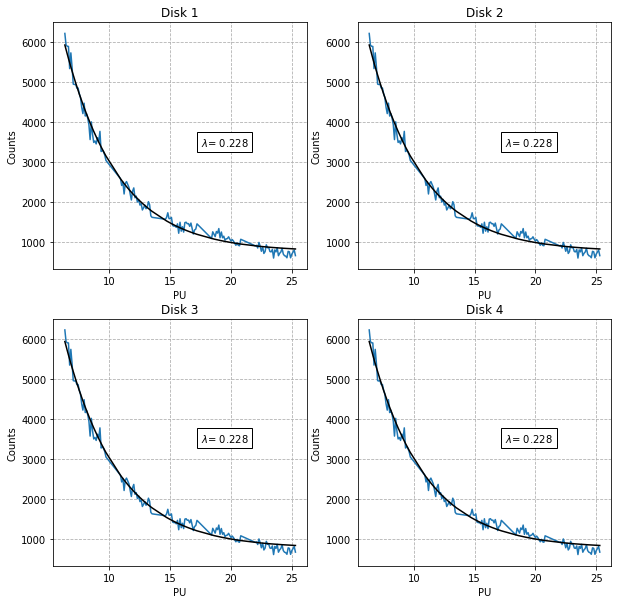

---- PU 200-----
------- Disk 1 --------
[2.28738648e-01 1.24794180e+01 8.26991849e+02 4.97017007e+02]
------- Disk 2 --------
[2.28738648e-01 1.24794180e+01 8.26991849e+02 4.97017007e+02]
------- Disk 3 --------
[2.28738648e-01 1.24794180e+01 8.26991849e+02 4.97017007e+02]
------- Disk 4 --------
[2.28738648e-01 1.24794180e+01 8.26991849e+02 4.97017007e+02]


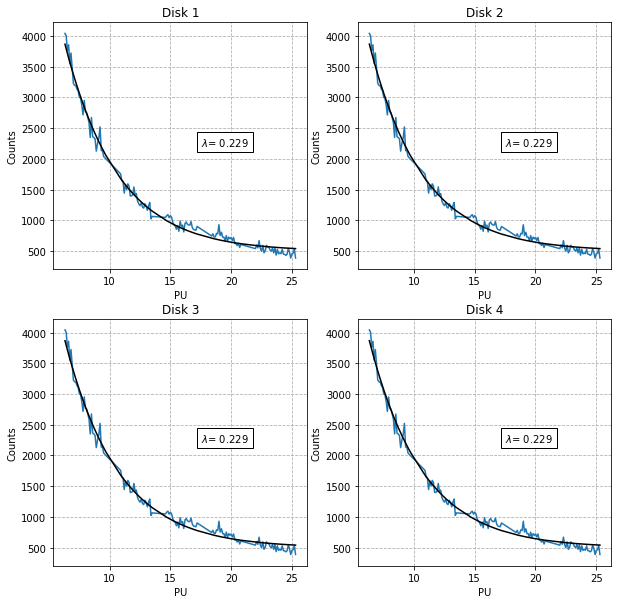

In [25]:
#PU_V = ['0','1']
#PU_V = ['10']
PU_V = ['1','2','20','30','50','75','100','140','175','200']
lim = [10,10,20,30,40,50,60,80,100,100,120]
col = ['purple','mediumorchid','magenta','r','coral','darkolivegreen','g','dodgerblue','b','teal','indigo']

# Coordinates of the line used to 
# evade module overlap
bin0 = [511,556.0]
bin1 = [517,759.0]
m = (bin1[1]-bin0[1])/(bin1[0]-bin0[0])
b = bin1[1]-m*bin1[0]

# Disk bins used to filter in the X direction
Dindex = [1,2,3,4]
DxBins = {
         -4:[343,343+15],
         -3:[686,686+15],
         -2:[984,984+15],
         -1:[1243,1243+15],
          1:[4726,4775],
          2:[4991,5040],
          3:[5286,5335],
          4:[5631,5680]
         }

# Disk bins used to filter in 
# the R direction evading the overlap
RyCm = {
        1:[6.6,10],
        2:[10.8,13.8],
        3:[14.5,17.4],
        4:[18.2,21.05],
        5:[21.9,25.4]
       }

# Parameters for the fit of the 
# decaying exponential in the R distribution
P0  = {
        1:[0.1, RyCm[1][0],  25000],
        2:[  1, RyCm[2][0],  30000],
        3:[  1, RyCm[2][0], 140000],
        4:[  1, RyCm[2][0], 140000],
        5:[  1, RyCm[2][0], 140000]
        }

rMaskRange = {
                1:[6.3,9.8],
                2:[10.9,13.6],
                3:[14.6,17.3],
                4:[18.3,20.9],
                5:[21.9,25.3],
                }

lamb   = {}
lambR1 = {}
N      = {}
for pu,n in zip(PU_V,range(len(PU_V))):
    print('---- PU '+str(pu)+'-----')

    file = TFile(DataFilePath+"summary_PU_"+pu+".0.root")
    tree = file.Get("BRIL_IT_Analysis/Clusters")
    R = tree.Get("XVsY")
    #R = file.Get("BRIL_IT_Analysis/Clusters/XVsY")

    lamb[pu]   = {}
    lambR1[pu] = {}
    N[pu]      = {}
    
    fig = plt.figure(figsize=(10,10))
    for d in Dindex:
        print('------- Disk '+str(d)+' --------')
        lamb  [pu][d] = []
        lambR1[pu][d] = []
        N     [pu][d] = []
        test = []

        xi,yi = 0,0
        x = []

        # Used to search diagonally 
        # trying to evade disks overlap
        for biny in range(int(bin0[1]),int(bin1[1])):
            count = 0
            binx = int((biny-b)/m)
            count += R.GetBinContent(binx,biny)
            
            xi = R.ProjectionY().GetBinCenter(binx)
            yi = R.ProjectionX().GetBinCenter(biny)
            r  = np.sqrt(xi**2 + yi**2)
            x.append(r)
            test.append(count)
        mask  = np.zeros(len(x))
        pars  = []
        xP    = []
        maskR = []
        for r in range(1,6):
            maskR.append((np.array(x) > rMaskRange[r][0]) & (np.array(x) < rMaskRange[r][1]))
            #maskR.append((np.array(x) > 0))
            mask += maskR[r-1]


        mask = np.array(mask,dtype=bool)
        x    = np.array(x)[mask]
        test = np.array(test)[mask]

        
        
        plt.subplot(2,2,d)
        plt.plot(x,test)
        
        param, cov_matrix = curve_fit(
                                      exp, 
                                      xdata = x,
                                      ydata = test,
                                      p0=[0.01,30,1700,100],
                                      #bounds = [[0,0],[30,np.inf]],
                                     )  
        plt.plot(x,exp(x,*param),'-k')
        print(param)
        
        ax = plt.gca()
        ax.set_xlabel('PU')
        ax.set_ylabel('Counts')
        plt.title('Disk '+str(d))
        plt.grid(linestyle='--')

        yrange = ax.get_ylim()
        
        plt.text(17.5,(yrange[1]-yrange[0])*0.5 + yrange[0],
                 #r'$\bar{\lambda}$= '+str(round(meanLamb,3))+'\n'
                 r'$\lambda$= '+str(round(param[0],3)),
                 bbox=dict(facecolor = 'white')
                )        
        
        #meanLamb = sum([p[0] for p in pars])/len(pars)
        #lamb[pu][d].append(meanLamb)
        #lambR1[pu][d].append(pars[0][0])
        lamb[pu][d].append(param[0])
        

    fig.savefig('/home/jcordero/CMS/BRIL/figs/RVsZ_projY_'+pu+'_'+str(d)+'.png')
    plt.show()
    

# Apply Corrections to the R projection

---- PU 1-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


/home/jcordero/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: RuntimeWarning: invalid value encountered in multiply
  pcov = pcov * s_sq


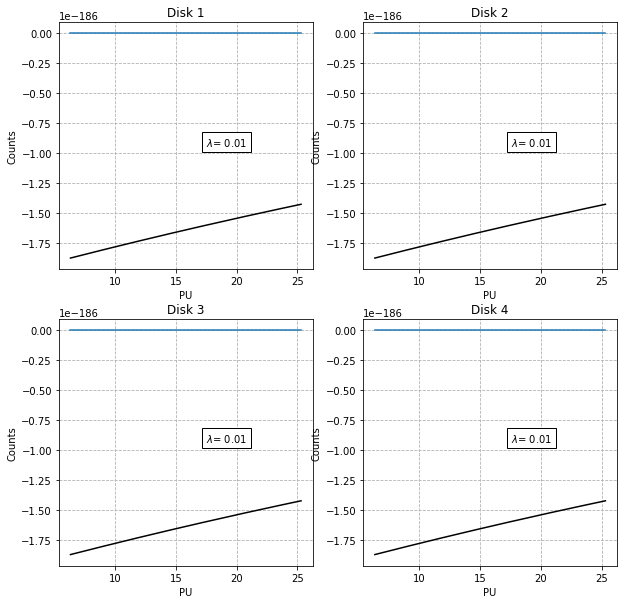

---- PU 2-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


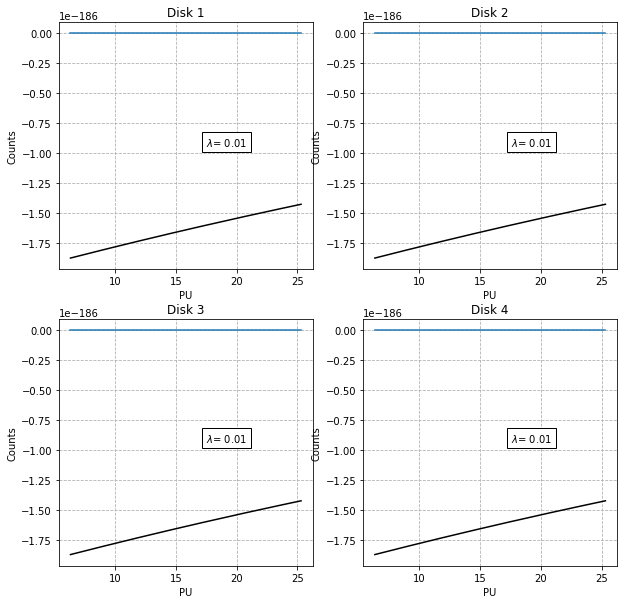

---- PU 20-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


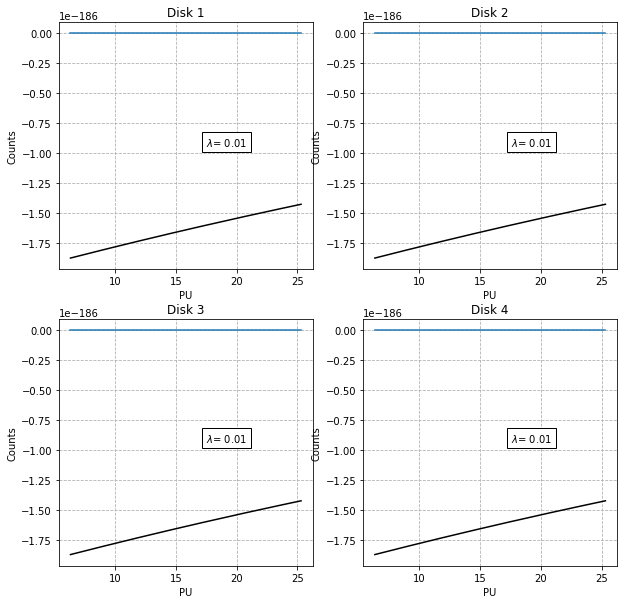

---- PU 30-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


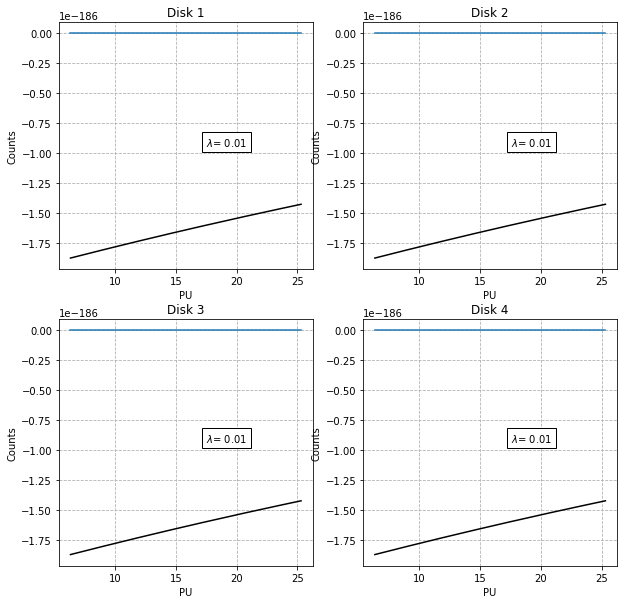

---- PU 50-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


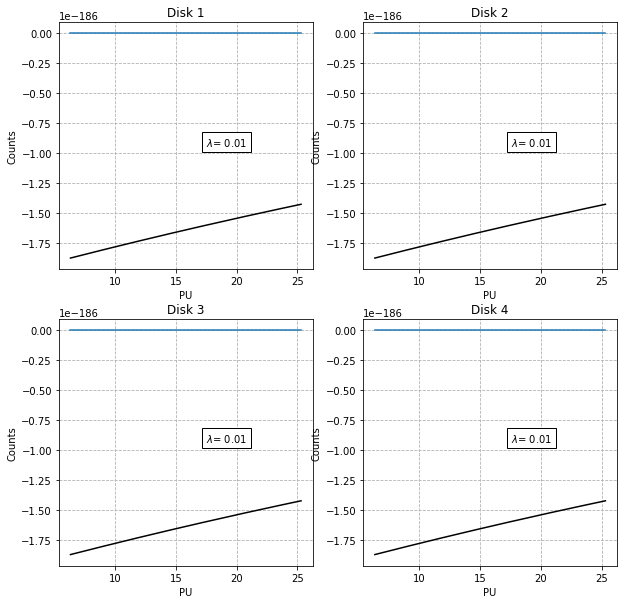

---- PU 75-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


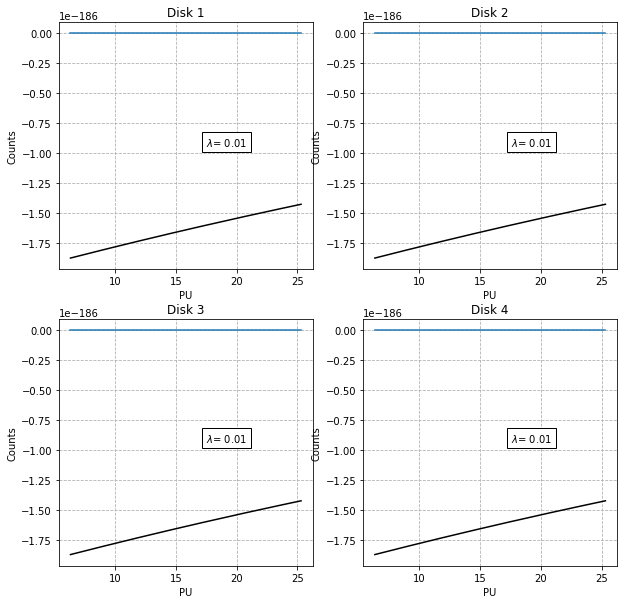

---- PU 100-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


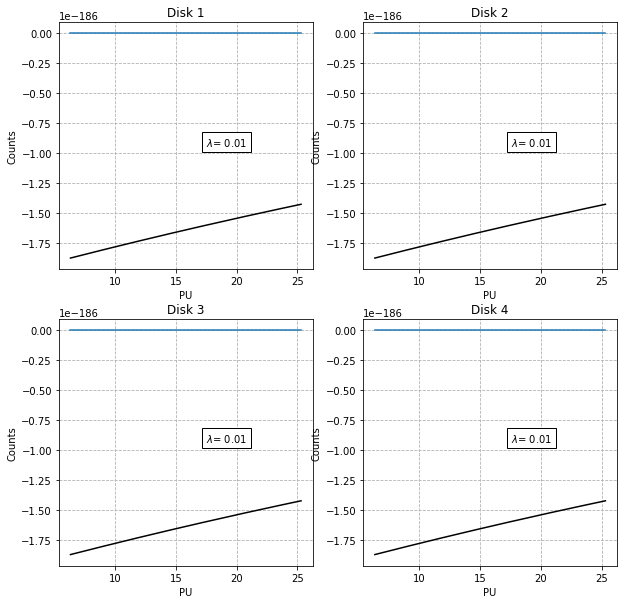

---- PU 140-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


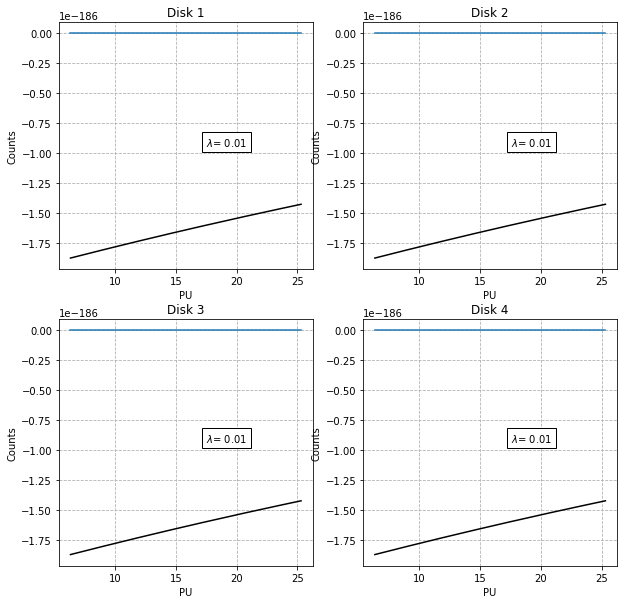

---- PU 175-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


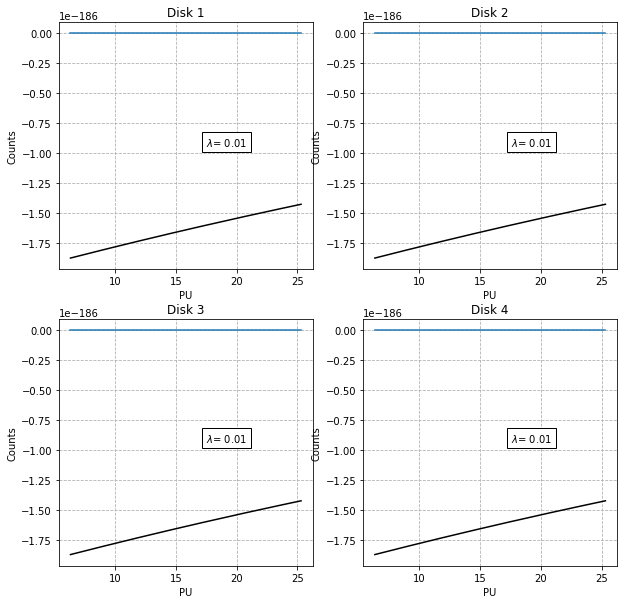

---- PU 200-----
------- Disk 1 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 2 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 3 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]
------- Disk 4 --------
[ 9.99998347e-003 -6.07943985e-007 -2.76531101e-186  7.23080589e-187]


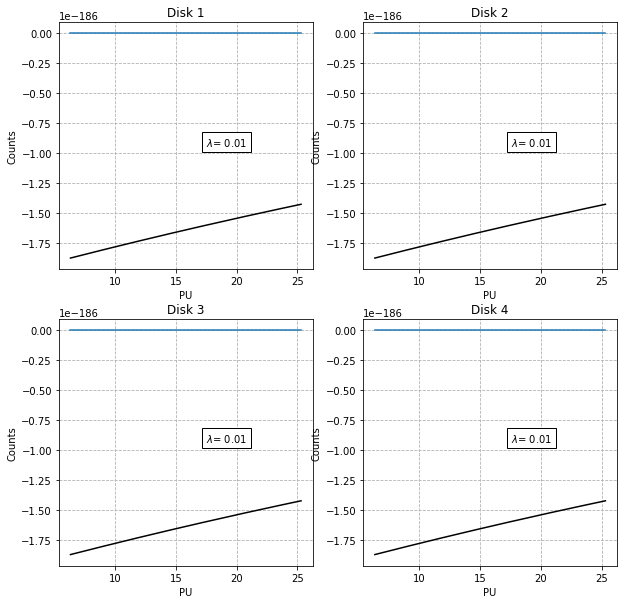

In [24]:
#PU_V = ['0','1']
#PU_V = ['10']
PU_V = ['1','2','20','30','50','75','100','140','175','200']
lim = [10,10,20,30,40,50,60,80,100,100,120]
col = ['purple','mediumorchid','magenta','r','coral','darkolivegreen','g','dodgerblue','b','teal','indigo']

bin0 = [511,556.0]
bin1 = [517,759.0]
m = (bin1[1]-bin0[1])/(bin1[0]-bin0[0])
b = bin1[1]-m*bin1[0]

DxBins = {
         -4:[343,343+15],
         -3:[686,686+15],
         -2:[984,984+15],
         -1:[1243,1243+15],
          1:[4726,4775],
          2:[4991,5040],
          3:[5286,5335],
          4:[5631,5680]
         }
RyCm = {
        1:[6.6,10],
        2:[10.8,13.8],
        3:[14.5,17.4],
        4:[18.2,21.05],
        5:[21.9,25.4]
       }# avoiding the overlap
P0  = {
        1:[0.1,RyCm[1][0],25000],
        2:[1,RyCm[2][0],30000],
        3:[1,RyCm[2][0],140000],
        4:[1,RyCm[2][0],140000],
        5:[1,RyCm[2][0],140000]
        }

rMaskRange = {
                1:[6.3,9.8],
                2:[10.9,13.6],
                3:[14.6,17.3],
                4:[18.3,20.9],
                5:[21.9,25.3],
                }

zMaskRange = {
                1:[174,176],
                2:[200,202],
                3:[230,232],
                4:[264,266],
                }
#Dindex = [-4,-3,-2,-1,1,2,3,4]
Dindex = [1,2,3,4]
lamb = {}
lambR1 = {}
N = {}
for pu,n in zip(PU_V,range(len(PU_V))):
    print('---- PU '+str(pu)+'-----')

    file = TFile(DataFilePath+"summary_PU_"+pu+".0.root")
    tree = file.Get("BRIL_IT_Analysis/Clusters")
    Z = tree.Get("CluZ")
    X = tree.Get("CluX")
    Y = tree.Get("CluY")

    lamb[pu] = {}
    lambR1[pu] = {}
    N[pu] = {}
    
    fig = plt.figure(figsize=(10,10))
    for d in Dindex:
        print('------- Disk '+str(d)+' --------')
        #lamb[pu][d] = []
        lambR1[pu][d] = []
        N[pu][d] = []
        test = []
        #xi,yi = [],[]
        xi,yi = 0,0
        x = []

        for biny in range(int(bin0[1]),int(bin1[1])):
            countX,countY = 0,0
            binx = int((biny-b)/m)
            countX = X.GetBinContent(binx)
            countY = Y.GetBinContent(biny)
            
            xi = X.GetBinCenter(binx)
            yi = Y.GetBinCenter(biny)
            r = np.sqrt(xi**2 + yi**2)
            x.append(r)
            test.append(count)
        mask = np.zeros(len(x))
        pars = []
        xP = []
        maskR = []
        for r in range(1,6):
            maskR.append((np.array(x) > rMaskRange[r][0]) & (np.array(x) < rMaskRange[r][1]))
            #maskR.append((np.array(x) > 0))
            mask += maskR[r-1]


        mask = np.array(mask,dtype=bool)
        x = np.array(x)[mask]
        test = np.array(test)[mask]

        
        
        plt.subplot(2,2,d)
        plt.plot(x,test)
        
        param, cov_matrix = curve_fit(
                                      exp, 
                                      xdata = x,
                                      ydata = test,
                                      p0=[0.01,30,1700,100],
                                      #bounds = [[0,0],[30,np.inf]],
                                     )  
        plt.plot(x,exp(x,*param),'-k')
        print(param)
        
        ax = plt.gca()
        ax.set_xlabel('PU')
        ax.set_ylabel('Counts')
        plt.title('Disk '+str(d))
        plt.grid(linestyle='--')

        yrange = ax.get_ylim()
        
        plt.text(17.5,(yrange[1]-yrange[0])*0.5 + yrange[0],
                 #r'$\bar{\lambda}$= '+str(round(meanLamb,3))+'\n'
                 r'$\lambda$= '+str(round(param[0],3)),
                 bbox=dict(facecolor = 'white')
                )        
        
        #meanLamb = sum([p[0] for p in pars])/len(pars)
        #lamb[pu][d].append(meanLamb)
        #lambR1[pu][d].append(pars[0][0])
        lamb[pu][d] = param[0]
        

    fig.savefig('/home/jcordero/CMS/BRIL/figs/RVsZ_projY_'+pu+'_'+str(d)+'.png')
    plt.show()
    

In [19]:
file = TFile(DataFilePath+"summary_PU_100.0.root")
tree = file.Get("BRIL_IT_Analysis/Clusters")
Z = tree.Get("CluZ")
X = tree.Get("CluX")
Y = tree.Get("CluY")

In [18]:
'''
print(X)
for t in tree:
    print(t.CluX)
'''

'\nprint(X)\nfor t in tree:\n    print(t.CluX)\n'

In [22]:
for i in np.arange(10):
    print(X.GetBinContent(i))

TypeError: none of the 3 overloaded methods succeeded. Full details:
  double TH1::GetBinContent(int bin) =>
    could not convert argument 1
  double TH1::GetBinContent(int bin, int) =>
    takes at least 2 arguments (1 given)
  double TH1::GetBinContent(int bin, int, int) =>
    takes at least 3 arguments (1 given)

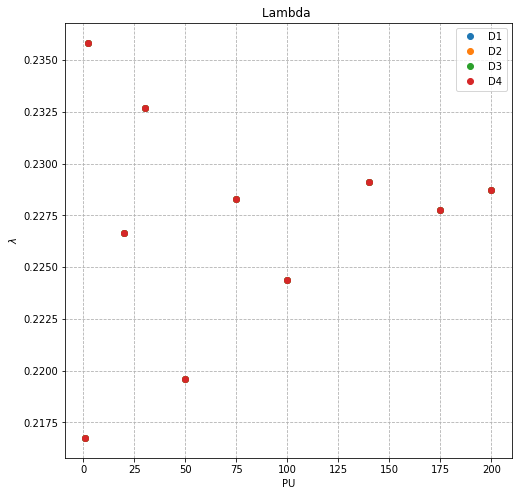

In [23]:
puRange = PU_V[:]


puX = [int(pu) for pu in puRange]
puY = [[lamb[pu][d] for pu in puRange] for d in Dindex]

plt.figure(figsize=(8,8))
for d in Dindex:
    plt.plot(puX,puY[d-1],label = 'D'+str(d),marker='o',linestyle='')

plt.legend()
plt.title('Lambda ')
plt.ylabel(r'$\lambda$')
plt.xlabel('PU')
plt.grid(linestyle='--')

fig.savefig('/home/jcordero/CMS/BRIL/figs/ExpFit_Disks.png')

# Occupancy Plot

In [ ]:
#PU_V = ['0','1']
#PU_V = ['10']
PU_V = ['1','2','20','30','50','75','100','140']#,'175','200']
lim = [10,10,20,30,40,50,60,80,100,100,120]
col = ['purple','mediumorchid','magenta','r','coral','darkolivegreen','g','dodgerblue','b','teal','indigo']


DxBins = {
         -4:[343,343+15],
         -3:[686,686+15],
         -2:[984,984+15],
         -1:[1243,1243+15],
          1:[4726,4775],
          2:[4991,5040],
          3:[5286,5335],
          4:[5631,5680]
         }
RyCm = {
        1:[6.6,10],
        2:[10.8,13.8],
        3:[14.5,17.4],
        4:[18.2,21.05],
        5:[21.9,25.4]
       }# avoiding the overlap
P0  = {
        1:[0.2,RyCm[1][0],140000],
        2:[1,RyCm[2][0],140000],
        3:[1,RyCm[2][0],140000],
        4:[1,RyCm[2][0],140000],
        5:[1,RyCm[2][0],140000]
        }

totalTEPX = 794e6
#pixPerDisk = 5724160 
pixPerDisk = totalTEPX/16
pixPerModule = 66560 


#Dindex = [-4,-3,-2,-1,1,2,3,4]
Dindex = [1,2,3,4]
Occ = {}
for pu,n in zip(PU_V,range(len(PU_V))):
    print('---- PU '+str(pu)+'-----')

    file = TFile(DataFilePath+"summary_PU_"+pu+".0.root")
    tree = file.Get("BRIL_IT_Analysis/Hits")
    R = tree.Get("RVsZ")

    Occ[pu] = {}
    for d in Dindex:
        print('------- Disk '+str(d)+' --------')
        Occ[pu][d] = []
        test = []
        x = []
        for i in range(100,600):
            count = 0
            count += R.ProjectionY('_py',DxBins[d][0],DxBins[d][1]).GetBinContent(i)
            count += R.ProjectionY('_py',DxBins[-d][0],DxBins[-d][1]).GetBinContent(i)
            x.append(R.ProjectionY('_py',DxBins[d][0],DxBins[d][1]).GetBinCenter(i))        
            test.append(count)
        Occ[pu][d].append(sum(test)/(pixPerDisk*4))
        #fig = plt.figure()
        #plt.plot(x,test)
        #plt.grid(linestyle='--')
        #plt.show()
        #fig.savefig('/home/jcordero/CMS/BRIL/figs/RVsZ_projY_'+pu+'_'+str(d)+'.png')
    
    

In [ ]:
puRange = PU_V[:]
fig = plt.figure(figsize = (15,5))
for d in Dindex:
    plt.subplot(1,4,d)
    plt.plot([int(pu) for pu in puRange],[Occ[pu][d] for pu in puRange],'bo')
    plt.title('Disk '+str(d))
    plt.ylabel('Occupancy per Disk')
    plt.xlabel('PU')
    plt.grid(linestyle='--')
fig.savefig('/home/jcordero/CMS/BRIL/figs/RVsZ_projY_OccPerDisk.png')